In [112]:

import pandas as pd
import numpy as np
import pickle
from datetime import datetime

import sys
sys.path.insert(0, "..")   
from src.model_utils import train, ShallowNN, TwoLayerNN, ResidualMLP
from src.utils import build_feature_and_label_cols
from src.plot_util import plot_all_sids_losses, plot_loss_per_sid, plot_median_iqr_loss, plot_final_percent_mav_per_sid



In [99]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
today_str = datetime.today().strftime("%Y-%m-%d")
today_str

'2025-06-09'

In [101]:
# load
df = pd.read_excel("../output/data/20250607_train_top_10_store_10_item_sales_cyclical_features_16_days_X_y.xlsx")
df.head()

,start_date,store_item,store,item,sales_day_1,sales_day_2,sales_day_3,sales_day_4,sales_day_5,sales_day_6,...,y_season_cos_7,y_season_cos_8,y_season_cos_9,y_season_cos_10,y_season_cos_11,y_season_cos_12,y_season_cos_13,y_season_cos_14,y_season_cos_15,y_season_cos_16
0,2013-01-09,3_1047679,3,1047679,398.0,520.0,543.0,910.0,784.0,467.0,...,0.677615,0.690173,0.702527,0.714673,0.726608,0.738326,0.749826,0.761104,0.772157,0.782980
1,2013-01-25,3_1047679,3,1047679,224.0,520.0,474.0,251.0,302.0,288.0,...,0.852078,0.860961,0.869589,0.877960,0.886071,0.893919,0.901502,0.908818,0.915864,0.922640
2,2013-02-10,3_1047679,3,1047679,245.0,308.0,243.0,286.0,231.0,267.0,...,0.962309,0.966848,0.971100,0.975065,0.978740,0.982126,0.985220,0.988023,0.990532,0.992749
3,2013-02-26,3_1047679,3,1047679,173.0,352.0,231.0,292.0,525.0,736.0,...,1.000000,0.999852,0.999407,0.998667,0.997630,0.996298,0.994671,0.992749,0.990532,0.988023
4,2013-03-14,3_1047679,3,1047679,429.0,419.0,504.0,623.0,293.0,250.0,...,0.962309,0.957485,0.952378,0.946988,0.941317,0.935368,0.929141,0.922640,0.915864,0.908818


In [102]:
df["start_date"].min(), df["start_date"].max()

(Timestamp('2013-01-09 00:00:00'), Timestamp('2017-07-15 00:00:00'))

In [103]:
df.dtypes

start_date         datetime64[ns]
store_item                 object
store                       int64
item                        int64
sales_day_1               float64
                        ...      
y_season_cos_12           float64
y_season_cos_13           float64
y_season_cos_14           float64
y_season_cos_15           float64
y_season_cos_16           float64
Length: 420, dtype: object

In [104]:
df.columns

Index(['start_date', 'store_item', 'store', 'item', 'sales_day_1',
       'sales_day_2', 'sales_day_3', 'sales_day_4', 'sales_day_5',
       'sales_day_6',
       ...
       'y_season_cos_7', 'y_season_cos_8', 'y_season_cos_9', 'y_season_cos_10',
       'y_season_cos_11', 'y_season_cos_12', 'y_season_cos_13',
       'y_season_cos_14', 'y_season_cos_15', 'y_season_cos_16'],
      dtype='object', length=420)

In [105]:
df.shape

(10386, 420)

In [106]:
window_size = 16
meta_cols,\
x_sales_features,\
x_cyclical_features,\
x_feature_cols,\
label_cols,\
y_sales_features,\
y_cyclical_features = build_feature_and_label_cols(window_size)



In [107]:
print(len(meta_cols))
print(len(x_feature_cols))
print(len(label_cols))
assert df.columns.to_list() == meta_cols + x_feature_cols + label_cols

4
208
208


In [108]:
weights_df= pd.read_excel("../output/data/top_10_item_weights.xlsx")

In [110]:
weights_df

,item,weight
0,114790,1.00
1,305229,1.00
2,314384,1.00
3,364606,1.00
4,502331,1.25
5,567623,1.00
6,581078,1.00
7,582864,1.25
8,584028,1.25
9,1047679,1.00


In [125]:
hist_df, summary_df, models_dict = train(
    df            = df,
    weights_df    = weights_df,
    x_feature_cols  = x_feature_cols,
    x_sales_features = x_sales_features,
    x_cyclical_features = x_cyclical_features,
    label_cols    = label_cols,
    y_cyclical_features = y_cyclical_features,
    y_sales_features = y_sales_features,
    item_col      = "item",
    train_frac    = 0.8,
    batch_size    = 64,
    lr            = 3e-4,
    epochs        = 100,
    seed          = 2025,
    model_cls     = TwoLayerNN,
    )    

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_1047679] Epoch 1/100 train_loss 4.1285, train_MAE 128.6233, train_%MAV 58.9404, test_loss 0.2684, test_MAE 113.9286, test_%MAV 60.1775, train_MPE 28988038.2873, test_MPE 3626977.0549
[3_1047679] Epoch 2/100 train_loss 4.1174, train_MAE 127.4698, train_%MAV 58.4119, test_loss 0.2627, test_MAE 112.1945, test_%MAV 59.2615, train_MPE 30738064.2521, test_MPE 3346842.7253
[3_1047679] Epoch 3/100 train_loss 4.0769, train_MAE 126.7460, train_%MAV 58.0802, test_loss 0.2587, test_MAE 110.8024, test_%MAV 58.5262, train_MPE 32218361.1196, test_MPE 2950396.4835
[3_1047679] Epoch 4/100 train_loss 4.0618, train_MAE 126.1051, train_%MAV 57.7865, test_loss 0.2565, test_MAE 110.1491, test_%MAV 58.1811, train_MPE 32469305.1789, test_MPE 2513748.3956
[3_1047679] Epoch 5/100 train_loss 4.0199, train_MAE 125.7255, train_%MAV 57.6126, test_loss 0.2552, test_MAE 109.7815, test_%MAV 57.9870, train_MPE 31908088.1705, test_MPE 2181603.6337
[3_1047679] Epoch 6/100 train_loss 3.9920, train_MAE 125.3620, train_%

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_114790] Epoch 1/100 train_loss 4.0701, train_MAE 18.3606, train_%MAV 45.9202, test_loss 0.2643, test_MAE 20.4428, test_%MAV 49.3247, train_MPE 12393960.7488, test_MPE 2277450.5495
[3_114790] Epoch 2/100 train_loss 4.0261, train_MAE 18.2833, train_%MAV 45.7270, test_loss 0.2600, test_MAE 20.3870, test_%MAV 49.1900, train_MPE 12310776.6450, test_MPE 2283517.1868
[3_114790] Epoch 3/100 train_loss 3.9901, train_MAE 18.2030, train_%MAV 45.5261, test_loss 0.2572, test_MAE 20.3372, test_%MAV 49.0698, train_MPE 12653535.4958, test_MPE 2263062.7399
[3_114790] Epoch 4/100 train_loss 3.9774, train_MAE 18.1369, train_%MAV 45.3606, test_loss 0.2551, test_MAE 20.2828, test_%MAV 48.9387, train_MPE 13205826.1946, test_MPE 2248309.4505
[3_114790] Epoch 5/100 train_loss 3.9426, train_MAE 18.1013, train_%MAV 45.2718, test_loss 0.2539, test_MAE 20.2579, test_%MAV 48.8784, train_MPE 13580688.4893, test_MPE 2233676.4249
[3_114790] Epoch 6/100 train_loss 3.9369, train_MAE 18.0713, train_%MAV 45.1968, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_305229] Epoch 1/100 train_loss 4.0421, train_MAE 26.2899, train_%MAV 46.9800, test_loss 0.2643, test_MAE 24.4747, test_%MAV 47.6500, train_MPE 17746273.9870, test_MPE 2367280.7619
[3_305229] Epoch 2/100 train_loss 4.0238, train_MAE 26.2061, train_%MAV 46.8303, test_loss 0.2594, test_MAE 24.2218, test_%MAV 47.1576, train_MPE 15854841.1196, test_MPE 2223958.9744
[3_305229] Epoch 3/100 train_loss 3.9706, train_MAE 26.0697, train_%MAV 46.5865, test_loss 0.2563, test_MAE 24.1232, test_%MAV 46.9656, train_MPE 14555862.9546, test_MPE 2102854.0952
[3_305229] Epoch 4/100 train_loss 3.9652, train_MAE 25.8954, train_%MAV 46.2751, test_loss 0.2542, test_MAE 24.0503, test_%MAV 46.8237, train_MPE 13681904.1038, test_MPE 2062645.4505
[3_305229] Epoch 5/100 train_loss 3.9407, train_MAE 25.7399, train_%MAV 45.9972, test_loss 0.2527, test_MAE 23.9787, test_%MAV 46.6842, train_MPE 13099078.2280, test_MPE 2063843.3993
[3_305229] Epoch 6/100 train_loss 3.9189, train_MAE 25.5785, train_%MAV 45.7088, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_314384] Epoch 2/100 train_loss 4.0411, train_MAE 42.4289, train_%MAV 48.2827, test_loss 0.2525, test_MAE 38.5839, test_%MAV 50.4264, train_MPE 14848876.9008, test_MPE 1254672.7619
[3_314384] Epoch 3/100 train_loss 4.0026, train_MAE 42.4147, train_%MAV 48.2666, test_loss 0.2532, test_MAE 38.7455, test_%MAV 50.6375, train_MPE 14532940.1594, test_MPE 1380816.0586
[3_314384] Epoch 4/100 train_loss 3.9961, train_MAE 42.4118, train_%MAV 48.2633, test_loss 0.2540, test_MAE 38.7794, test_%MAV 50.6818, train_MPE 14767833.5644, test_MPE 1525946.4908
[3_314384] Epoch 5/100 train_loss 3.9642, train_MAE 42.3022, train_%MAV 48.1386, test_loss 0.2542, test_MAE 38.7973, test_%MAV 50.7052, train_MPE 15412402.8916, test_MPE 1693785.7875
[3_314384] Epoch 6/100 train_loss 3.9460, train_MAE 42.1994, train_%MAV 48.0216, test_loss 0.2543, test_MAE 38.8041, test_%MAV 50.7141, train_MPE 15587100.4708, test_MPE 1875752.3223
[3_314384] Epoch 7/100 train_loss 3.9062, train_MAE 42.1168, train_%MAV 47.9276, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_364606] Epoch 1/100 train_loss 4.1290, train_MAE 45.6371, train_%MAV 50.2956, test_loss 0.2670, test_MAE 42.1485, test_%MAV 51.2453, train_MPE 25585221.7535, test_MPE 645258.4322
[3_364606] Epoch 2/100 train_loss 4.0864, train_MAE 45.5220, train_%MAV 50.1688, test_loss 0.2621, test_MAE 41.9781, test_%MAV 51.0381, train_MPE 22314204.1742, test_MPE 732638.1832
[3_364606] Epoch 3/100 train_loss 4.0946, train_MAE 45.4783, train_%MAV 50.1206, test_loss 0.2591, test_MAE 41.9449, test_%MAV 50.9977, train_MPE 19940867.3216, test_MPE 795596.9524
[3_364606] Epoch 4/100 train_loss 4.0404, train_MAE 45.3864, train_%MAV 50.0194, test_loss 0.2568, test_MAE 41.8462, test_%MAV 50.8777, train_MPE 18654999.4884, test_MPE 837732.9231
[3_364606] Epoch 5/100 train_loss 4.0300, train_MAE 45.3610, train_%MAV 49.9913, test_loss 0.2554, test_MAE 41.9242, test_%MAV 50.9726, train_MPE 18054581.5014, test_MPE 827868.0733
[3_364606] Epoch 6/100 train_loss 4.0036, train_MAE 45.3947, train_%MAV 50.0284, test_loss

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_502331] Epoch 2/100 train_loss 4.1361, train_MAE 34.9582, train_%MAV 49.0521, test_loss 0.2609, test_MAE 31.6851, test_%MAV 50.9273, train_MPE 15723429.8424, test_MPE 446033.5824
[3_502331] Epoch 3/100 train_loss 4.1168, train_MAE 34.7836, train_%MAV 48.8070, test_loss 0.2590, test_MAE 31.5560, test_%MAV 50.7198, train_MPE 15172904.5709, test_MPE 304104.1465
[3_502331] Epoch 4/100 train_loss 4.0842, train_MAE 34.6962, train_%MAV 48.6844, test_loss 0.2580, test_MAE 31.4801, test_%MAV 50.5978, train_MPE 15056276.2854, test_MPE 160140.1319
[3_502331] Epoch 5/100 train_loss 4.0503, train_MAE 34.5739, train_%MAV 48.5129, test_loss 0.2570, test_MAE 31.3586, test_%MAV 50.4026, train_MPE 15047354.2465, test_MPE 109568.8205
[3_502331] Epoch 6/100 train_loss 4.0232, train_MAE 34.5076, train_%MAV 48.4198, test_loss 0.2565, test_MAE 31.3307, test_%MAV 50.3577, train_MPE 14971662.9472, test_MPE 45470.1245
[3_502331] Epoch 7/100 train_loss 4.0151, train_MAE 34.4362, train_%MAV 48.3196, test_loss 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_567623] Epoch 8/100 train_loss 3.8778, train_MAE 19.6294, train_%MAV 47.7922, test_loss 0.2593, test_MAE 24.7366, test_%MAV 53.5558, train_MPE 8164209.4087, test_MPE 1538556.7179
[3_567623] Epoch 9/100 train_loss 3.8862, train_MAE 19.5392, train_%MAV 47.5726, test_loss 0.2585, test_MAE 24.6484, test_%MAV 53.3648, train_MPE 8538414.0278, test_MPE 1633623.2088
[3_567623] Epoch 10/100 train_loss 3.8784, train_MAE 19.4640, train_%MAV 47.3897, test_loss 0.2577, test_MAE 24.5579, test_%MAV 53.1688, train_MPE 8927594.2910, test_MPE 1708702.5934
[3_567623] Epoch 11/100 train_loss 3.8394, train_MAE 19.3942, train_%MAV 47.2197, test_loss 0.2570, test_MAE 24.4567, test_%MAV 52.9498, train_MPE 9305271.3994, test_MPE 1777609.1429
[3_567623] Epoch 12/100 train_loss 3.8181, train_MAE 19.3359, train_%MAV 47.0776, test_loss 0.2563, test_MAE 24.3795, test_%MAV 52.7827, train_MPE 9740457.6386, test_MPE 1801633.9927
[3_567623] Epoch 13/100 train_loss 3.7950, train_MAE 19.3149, train_%MAV 47.0265, test_

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_581078] Epoch 3/100 train_loss 4.0846, train_MAE 17.7078, train_%MAV 48.0024, test_loss 0.2627, test_MAE 18.3851, test_%MAV 51.1118, train_MPE 9980128.9194, test_MPE 2796001.0549
[3_581078] Epoch 4/100 train_loss 4.0638, train_MAE 17.6397, train_%MAV 47.8177, test_loss 0.2612, test_MAE 18.3751, test_%MAV 51.0843, train_MPE 9800031.3772, test_MPE 2236305.3480
[3_581078] Epoch 5/100 train_loss 4.0243, train_MAE 17.5750, train_%MAV 47.6423, test_loss 0.2600, test_MAE 18.3908, test_%MAV 51.1279, train_MPE 9532410.5431, test_MPE 1649226.7839
[3_581078] Epoch 6/100 train_loss 4.0085, train_MAE 17.4871, train_%MAV 47.4042, test_loss 0.2592, test_MAE 18.4177, test_%MAV 51.2025, train_MPE 9609292.3967, test_MPE 1200877.0110
[3_581078] Epoch 7/100 train_loss 3.9677, train_MAE 17.3951, train_%MAV 47.1546, test_loss 0.2586, test_MAE 18.4203, test_%MAV 51.2098, train_MPE 9674211.2919, test_MPE 796416.0000
[3_581078] Epoch 8/100 train_loss 3.9654, train_MAE 17.3005, train_%MAV 46.8984, test_loss 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_582864] Epoch 11/100 train_loss 3.8410, train_MAE 35.6896, train_%MAV 54.9858, test_loss 0.2498, test_MAE 39.9359, test_%MAV 57.1427, train_MPE 20604794.6617, test_MPE 1962989.3626
[3_582864] Epoch 12/100 train_loss 3.8271, train_MAE 35.6677, train_%MAV 54.9520, test_loss 0.2495, test_MAE 39.9303, test_%MAV 57.1347, train_MPE 21019489.5125, test_MPE 1925152.5861
[3_582864] Epoch 13/100 train_loss 3.8259, train_MAE 35.6242, train_%MAV 54.8849, test_loss 0.2491, test_MAE 39.9162, test_%MAV 57.1145, train_MPE 21447019.0028, test_MPE 1986806.6227
[3_582864] Epoch 14/100 train_loss 3.7974, train_MAE 35.6186, train_%MAV 54.8763, test_loss 0.2486, test_MAE 39.8866, test_%MAV 57.0722, train_MPE 21901758.9917, test_MPE 2075749.7436
[3_582864] Epoch 15/100 train_loss 3.7561, train_MAE 35.6017, train_%MAV 54.8502, test_loss 0.2478, test_MAE 39.8126, test_%MAV 56.9664, train_MPE 22155263.5255, test_MPE 2148607.5311
[3_582864] Epoch 16/100 train_loss 3.7538, train_MAE 35.5796, train_%MAV 54.8162

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[3_584028] Epoch 1/100 train_loss 4.0987, train_MAE 38.0773, train_%MAV 49.1991, test_loss 0.2644, test_MAE 36.0617, test_%MAV 50.2975, train_MPE 21855994.0686, test_MPE 8684875.9560
[3_584028] Epoch 2/100 train_loss 4.0616, train_MAE 38.2143, train_%MAV 49.3761, test_loss 0.2596, test_MAE 36.1548, test_%MAV 50.4273, train_MPE 20046307.2919, test_MPE 7541550.8864
[3_584028] Epoch 3/100 train_loss 4.0437, train_MAE 38.3092, train_%MAV 49.4987, test_loss 0.2564, test_MAE 36.1756, test_%MAV 50.4563, train_MPE 18820619.3883, test_MPE 6711850.1978
[3_584028] Epoch 4/100 train_loss 4.0151, train_MAE 38.3196, train_%MAV 49.5122, test_loss 0.2547, test_MAE 36.1680, test_%MAV 50.4457, train_MPE 18037126.2873, test_MPE 6131795.4579
[3_584028] Epoch 5/100 train_loss 4.0022, train_MAE 38.2410, train_%MAV 49.4106, test_loss 0.2537, test_MAE 36.1047, test_%MAV 50.3574, train_MPE 17455356.9157, test_MPE 6304956.9524
[3_584028] Epoch 6/100 train_loss 3.9837, train_MAE 38.1552, train_%MAV 49.2998, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_1047679] Epoch 11/100 train_loss 3.8629, train_MAE 125.1830, train_%MAV 52.0193, test_loss 0.2503, test_MAE 116.0750, test_%MAV 59.6016, train_MPE 41199794.4171, test_MPE 5501547.3700
[44_1047679] Epoch 12/100 train_loss 3.8081, train_MAE 124.8006, train_%MAV 51.8604, test_loss 0.2497, test_MAE 115.9479, test_%MAV 59.5363, train_MPE 41228853.6200, test_MPE 5430582.8571
[44_1047679] Epoch 13/100 train_loss 3.8039, train_MAE 124.7554, train_%MAV 51.8416, test_loss 0.2492, test_MAE 116.1372, test_%MAV 59.6336, train_MPE 40243311.9852, test_MPE 5375392.3516
[44_1047679] Epoch 14/100 train_loss 3.7818, train_MAE 124.6767, train_%MAV 51.8089, test_loss 0.2485, test_MAE 115.9919, test_%MAV 59.5589, train_MPE 40357195.2104, test_MPE 5355874.9304
[44_1047679] Epoch 15/100 train_loss 3.7581, train_MAE 124.5827, train_%MAV 51.7698, test_loss 0.2477, test_MAE 116.1902, test_%MAV 59.6608, train_MPE 39857148.2039, test_MPE 5524798.3590
[44_1047679] Epoch 16/100 train_loss 3.7290, train_MAE 124.3

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_114790] Epoch 1/100 train_loss 4.0944, train_MAE 21.8783, train_%MAV 50.3635, test_loss 0.2705, test_MAE 26.7547, test_%MAV 54.8848, train_MPE 16082312.3875, test_MPE 8353835.1355
[44_114790] Epoch 2/100 train_loss 4.0523, train_MAE 21.5853, train_%MAV 49.6890, test_loss 0.2654, test_MAE 26.6098, test_%MAV 54.5876, train_MPE 14271965.4777, test_MPE 8310376.0879
[44_114790] Epoch 3/100 train_loss 4.0467, train_MAE 21.4361, train_%MAV 49.3456, test_loss 0.2619, test_MAE 26.5933, test_%MAV 54.5538, train_MPE 13060108.3989, test_MPE 8332253.3040
[44_114790] Epoch 4/100 train_loss 4.0096, train_MAE 21.3809, train_%MAV 49.2187, test_loss 0.2598, test_MAE 26.6077, test_%MAV 54.5832, train_MPE 12318640.9877, test_MPE 8516728.9670
[44_114790] Epoch 5/100 train_loss 4.0048, train_MAE 21.2912, train_%MAV 49.0122, test_loss 0.2584, test_MAE 26.5428, test_%MAV 54.4502, train_MPE 11934485.8803, test_MPE 8766777.2015
[44_114790] Epoch 6/100 train_loss 3.9691, train_MAE 21.2248, train_%MAV 48.8593

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_305229] Epoch 7/100 train_loss 3.9230, train_MAE 31.4481, train_%MAV 58.1130, test_loss 0.2503, test_MAE 32.5963, test_%MAV 60.7772, train_MPE 15577481.8462, test_MPE 10175857.4652
[44_305229] Epoch 8/100 train_loss 3.8955, train_MAE 31.5339, train_%MAV 58.2716, test_loss 0.2500, test_MAE 32.7898, test_%MAV 61.1380, train_MPE 16085606.2576, test_MPE 10268201.2601
[44_305229] Epoch 9/100 train_loss 3.8969, train_MAE 31.5838, train_%MAV 58.3638, test_loss 0.2496, test_MAE 32.9052, test_%MAV 61.3532, train_MPE 16528225.9870, test_MPE 10373928.3223
[44_305229] Epoch 10/100 train_loss 3.8563, train_MAE 31.6651, train_%MAV 58.5139, test_loss 0.2492, test_MAE 32.9944, test_%MAV 61.5195, train_MPE 17231964.5301, test_MPE 10389037.0110
[44_305229] Epoch 11/100 train_loss 3.8521, train_MAE 31.6027, train_%MAV 58.3987, test_loss 0.2490, test_MAE 32.9650, test_%MAV 61.4647, train_MPE 18007403.4773, test_MPE 10271881.8462
[44_305229] Epoch 12/100 train_loss 3.8251, train_MAE 31.6172, train_%MAV

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_314384] Epoch 3/100 train_loss 4.0615, train_MAE 46.3206, train_%MAV 51.2699, test_loss 0.2603, test_MAE 43.7813, test_%MAV 54.3242, train_MPE 17909342.9027, test_MPE 8498763.9560
[44_314384] Epoch 4/100 train_loss 4.0338, train_MAE 46.1256, train_%MAV 51.0540, test_loss 0.2585, test_MAE 43.6234, test_%MAV 54.1282, train_MPE 18881905.1715, test_MPE 8460753.1136
[44_314384] Epoch 5/100 train_loss 4.0000, train_MAE 45.9723, train_%MAV 50.8843, test_loss 0.2574, test_MAE 43.4839, test_%MAV 53.9551, train_MPE 19512435.3068, test_MPE 8493866.1978
[44_314384] Epoch 6/100 train_loss 3.9756, train_MAE 45.9464, train_%MAV 50.8557, test_loss 0.2568, test_MAE 43.5129, test_%MAV 53.9911, train_MPE 20141208.7933, test_MPE 8576455.7363
[44_314384] Epoch 7/100 train_loss 3.9506, train_MAE 45.9005, train_%MAV 50.8049, test_loss 0.2567, test_MAE 43.5657, test_%MAV 54.0566, train_MPE 20615560.4226, test_MPE 8734814.7106
[44_314384] Epoch 8/100 train_loss 3.9200, train_MAE 45.8416, train_%MAV 50.7397

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_364606] Epoch 9/100 train_loss 3.8561, train_MAE 48.3480, train_%MAV 51.0022, test_loss 0.2468, test_MAE 45.8849, test_%MAV 55.7250, train_MPE 19969848.7044, test_MPE 7632643.2821
[44_364606] Epoch 10/100 train_loss 3.8323, train_MAE 48.2211, train_%MAV 50.8684, test_loss 0.2462, test_MAE 45.7562, test_%MAV 55.5686, train_MPE 19617854.1613, test_MPE 6955496.0879
[44_364606] Epoch 11/100 train_loss 3.7871, train_MAE 48.1729, train_%MAV 50.8175, test_loss 0.2456, test_MAE 45.7310, test_%MAV 55.5381, train_MPE 19799775.9703, test_MPE 6090362.3736
[44_364606] Epoch 12/100 train_loss 3.7712, train_MAE 48.0365, train_%MAV 50.6736, test_loss 0.2449, test_MAE 45.6868, test_%MAV 55.4845, train_MPE 20006244.3596, test_MPE 5359211.8388
[44_364606] Epoch 13/100 train_loss 3.7257, train_MAE 47.8486, train_%MAV 50.4754, test_loss 0.2440, test_MAE 45.4998, test_%MAV 55.2573, train_MPE 20078420.2261, test_MPE 4942825.0256
[44_364606] Epoch 14/100 train_loss 3.7500, train_MAE 47.6198, train_%MAV 50

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_502331] Epoch 4/100 train_loss 3.9882, train_MAE 35.2688, train_%MAV 46.4561, test_loss 0.2553, test_MAE 33.9236, test_%MAV 48.5504, train_MPE 18050646.3614, test_MPE 8040270.7692
[44_502331] Epoch 5/100 train_loss 3.9514, train_MAE 35.2317, train_%MAV 46.4072, test_loss 0.2533, test_MAE 33.8623, test_%MAV 48.4626, train_MPE 17579721.1937, test_MPE 8293794.2271
[44_502331] Epoch 6/100 train_loss 3.9278, train_MAE 35.2193, train_%MAV 46.3909, test_loss 0.2519, test_MAE 33.8527, test_%MAV 48.4489, train_MPE 17226089.1047, test_MPE 8371716.6886
[44_502331] Epoch 7/100 train_loss 3.8927, train_MAE 35.1801, train_%MAV 46.3393, test_loss 0.2507, test_MAE 33.7867, test_%MAV 48.3545, train_MPE 17159686.1687, test_MPE 8277181.4212
[44_502331] Epoch 8/100 train_loss 3.8674, train_MAE 35.1081, train_%MAV 46.2444, test_loss 0.2499, test_MAE 33.7079, test_%MAV 48.2417, train_MPE 17072466.3281, test_MPE 8297622.9744
[44_502331] Epoch 9/100 train_loss 3.8324, train_MAE 35.0091, train_%MAV 46.1141

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_567623] Epoch 3/100 train_loss 3.9918, train_MAE 24.4959, train_%MAV 50.7522, test_loss 0.2595, test_MAE 31.0524, test_%MAV 54.4382, train_MPE 8013422.3244, test_MPE 12070774.1538
[44_567623] Epoch 4/100 train_loss 3.9839, train_MAE 24.3242, train_%MAV 50.3964, test_loss 0.2577, test_MAE 31.0845, test_%MAV 54.4944, train_MPE 8209379.7665, test_MPE 12477493.4505
[44_567623] Epoch 5/100 train_loss 3.9364, train_MAE 24.1785, train_%MAV 50.0946, test_loss 0.2565, test_MAE 31.1052, test_%MAV 54.5308, train_MPE 8459530.2020, test_MPE 13066571.0183
[44_567623] Epoch 6/100 train_loss 3.9134, train_MAE 24.0719, train_%MAV 49.8737, test_loss 0.2557, test_MAE 31.0997, test_%MAV 54.5211, train_MPE 8611762.4171, test_MPE 13466011.6630
[44_567623] Epoch 7/100 train_loss 3.8721, train_MAE 24.0117, train_%MAV 49.7490, test_loss 0.2552, test_MAE 31.0859, test_%MAV 54.4968, train_MPE 8924991.3475, test_MPE 13919217.9341
[44_567623] Epoch 8/100 train_loss 3.8663, train_MAE 23.9041, train_%MAV 49.5260

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_581078] Epoch 5/100 train_loss 3.9961, train_MAE 22.8457, train_%MAV 46.9159, test_loss 0.2595, test_MAE 27.6198, test_%MAV 52.7758, train_MPE 13849762.2836, test_MPE 16019876.1026
[44_581078] Epoch 6/100 train_loss 3.9732, train_MAE 22.8638, train_%MAV 46.9529, test_loss 0.2582, test_MAE 27.6055, test_%MAV 52.7484, train_MPE 14504647.2956, test_MPE 16039566.5348
[44_581078] Epoch 7/100 train_loss 3.9430, train_MAE 22.8397, train_%MAV 46.9036, test_loss 0.2570, test_MAE 27.5362, test_%MAV 52.6159, train_MPE 15238432.5042, test_MPE 15981271.6777
[44_581078] Epoch 8/100 train_loss 3.9163, train_MAE 22.8222, train_%MAV 46.8676, test_loss 0.2560, test_MAE 27.5056, test_%MAV 52.5576, train_MPE 15940648.8082, test_MPE 16063405.4799
[44_581078] Epoch 9/100 train_loss 3.8970, train_MAE 22.7567, train_%MAV 46.7331, test_loss 0.2553, test_MAE 27.4314, test_%MAV 52.4157, train_MPE 16744865.0973, test_MPE 16314512.4103
[44_581078] Epoch 10/100 train_loss 3.8612, train_MAE 22.6867, train_%MAV 4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_582864] Epoch 5/100 train_loss 3.9297, train_MAE 32.2223, train_%MAV 51.8886, test_loss 0.2502, test_MAE 37.4120, test_%MAV 52.6216, train_MPE 16005408.5042, test_MPE 16214936.8498
[44_582864] Epoch 6/100 train_loss 3.9100, train_MAE 32.1995, train_%MAV 51.8519, test_loss 0.2491, test_MAE 37.3188, test_%MAV 52.4906, train_MPE 16063531.1807, test_MPE 16167243.9560
[44_582864] Epoch 7/100 train_loss 3.9170, train_MAE 32.2624, train_%MAV 51.9532, test_loss 0.2484, test_MAE 37.2711, test_%MAV 52.4235, train_MPE 15955866.9286, test_MPE 16170368.4689
[44_582864] Epoch 8/100 train_loss 3.8850, train_MAE 32.2586, train_%MAV 51.9470, test_loss 0.2477, test_MAE 37.2125, test_%MAV 52.3411, train_MPE 16238701.6126, test_MPE 16226292.7473
[44_582864] Epoch 9/100 train_loss 3.8537, train_MAE 32.2654, train_%MAV 51.9579, test_loss 0.2469, test_MAE 37.1775, test_%MAV 52.2918, train_MPE 16226469.1307, test_MPE 16191988.7473
[44_582864] Epoch 10/100 train_loss 3.8214, train_MAE 32.3079, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[44_584028] Epoch 7/100 train_loss 3.8971, train_MAE 39.9981, train_%MAV 47.4635, test_loss 0.2521, test_MAE 36.6923, test_%MAV 47.3223, train_MPE 19191218.6543, test_MPE 11571949.2454
[44_584028] Epoch 8/100 train_loss 3.8843, train_MAE 39.8548, train_%MAV 47.2934, test_loss 0.2504, test_MAE 36.4687, test_%MAV 47.0339, train_MPE 19115875.8851, test_MPE 11866580.8645
[44_584028] Epoch 9/100 train_loss 3.8498, train_MAE 39.7248, train_%MAV 47.1391, test_loss 0.2491, test_MAE 36.2915, test_%MAV 46.8054, train_MPE 19117986.5209, test_MPE 12030238.0073
[44_584028] Epoch 10/100 train_loss 3.8230, train_MAE 39.6241, train_%MAV 47.0196, test_loss 0.2479, test_MAE 36.1571, test_%MAV 46.6320, train_MPE 19225687.7850, test_MPE 12224249.4359
[44_584028] Epoch 11/100 train_loss 3.7995, train_MAE 39.5437, train_%MAV 46.9242, test_loss 0.2469, test_MAE 36.0686, test_%MAV 46.5179, train_MPE 19346068.9972, test_MPE 12480432.2930
[44_584028] Epoch 12/100 train_loss 3.7819, train_MAE 39.4208, train_%MAV

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_1047679] Epoch 1/100 train_loss 4.0662, train_MAE 62.5842, train_%MAV 59.0341, test_loss 0.2709, test_MAE 77.0305, test_%MAV 59.2804, train_MPE 32060167.3550, test_MPE 207145.3187
[45_1047679] Epoch 2/100 train_loss 4.0173, train_MAE 61.9421, train_%MAV 58.4284, test_loss 0.2656, test_MAE 76.3973, test_%MAV 58.7931, train_MPE 29563169.4532, test_MPE 86280.1319
[45_1047679] Epoch 3/100 train_loss 4.0274, train_MAE 61.5906, train_%MAV 58.0969, test_loss 0.2621, test_MAE 76.1324, test_%MAV 58.5893, train_MPE 27812870.6432, test_MPE 392725.0110
[45_1047679] Epoch 4/100 train_loss 3.9836, train_MAE 61.4076, train_%MAV 57.9243, test_loss 0.2593, test_MAE 76.1246, test_%MAV 58.5832, train_MPE 26214539.9815, test_MPE 570772.2198
[45_1047679] Epoch 5/100 train_loss 3.9572, train_MAE 61.3874, train_%MAV 57.9052, test_loss 0.2574, test_MAE 76.1290, test_%MAV 58.5866, train_MPE 25103154.5357, test_MPE 695545.3187
[45_1047679] Epoch 6/100 train_loss 3.9317, train_MAE 61.3957, train_%MAV 57.9130

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_114790] Epoch 5/100 train_loss 4.0501, train_MAE 24.0493, train_%MAV 51.3241, test_loss 0.2556, test_MAE 32.0282, test_%MAV 57.6769, train_MPE 10220184.7933, test_MPE 216123.2527
[45_114790] Epoch 6/100 train_loss 4.0145, train_MAE 24.0673, train_%MAV 51.3624, test_loss 0.2559, test_MAE 32.0823, test_%MAV 57.7743, train_MPE 10116318.0723, test_MPE 232181.8022
[45_114790] Epoch 7/100 train_loss 3.9883, train_MAE 24.0315, train_%MAV 51.2860, test_loss 0.2561, test_MAE 32.1143, test_%MAV 57.8319, train_MPE 10151632.5487, test_MPE 270464.7912
[45_114790] Epoch 8/100 train_loss 3.9611, train_MAE 23.9731, train_%MAV 51.1615, test_loss 0.2561, test_MAE 32.1480, test_%MAV 57.8927, train_MPE 10086041.7424, test_MPE 395374.7106
[45_114790] Epoch 9/100 train_loss 3.9479, train_MAE 23.9331, train_%MAV 51.0761, test_loss 0.2560, test_MAE 32.2026, test_%MAV 57.9909, train_MPE 9996976.9935, test_MPE 568258.8718
[45_114790] Epoch 10/100 train_loss 3.9291, train_MAE 23.9279, train_%MAV 51.0650, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_305229] Epoch 9/100 train_loss 3.8735, train_MAE 25.6315, train_%MAV 47.7731, test_loss 0.2467, test_MAE 26.1215, test_%MAV 47.7475, train_MPE 20503105.0083, test_MPE 2390023.0330
[45_305229] Epoch 10/100 train_loss 3.8443, train_MAE 25.5514, train_%MAV 47.6239, test_loss 0.2462, test_MAE 26.0649, test_%MAV 47.6441, train_MPE 21061703.1770, test_MPE 2455678.3590
[45_305229] Epoch 11/100 train_loss 3.8148, train_MAE 25.4934, train_%MAV 47.5157, test_loss 0.2456, test_MAE 26.0460, test_%MAV 47.6096, train_MPE 21651120.9935, test_MPE 2525807.8242
[45_305229] Epoch 12/100 train_loss 3.7935, train_MAE 25.4074, train_%MAV 47.3555, test_loss 0.2451, test_MAE 25.9789, test_%MAV 47.4870, train_MPE 22241593.6534, test_MPE 2659219.2234
[45_305229] Epoch 13/100 train_loss 3.7811, train_MAE 25.3548, train_%MAV 47.2575, test_loss 0.2445, test_MAE 25.9253, test_%MAV 47.3888, train_MPE 22727986.0612, test_MPE 2705471.0623
[45_305229] Epoch 14/100 train_loss 3.7523, train_MAE 25.2635, train_%MAV 47

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_314384] Epoch 1/100 train_loss 4.0975, train_MAE 56.2756, train_%MAV 54.1603, test_loss 0.2707, test_MAE 53.7100, test_%MAV 57.6548, train_MPE 17880105.7572, test_MPE 1561.7289
[45_314384] Epoch 2/100 train_loss 4.0607, train_MAE 55.5038, train_%MAV 53.4176, test_loss 0.2661, test_MAE 52.6248, test_%MAV 56.4899, train_MPE 16942103.7257, test_MPE 273285.8022
[45_314384] Epoch 3/100 train_loss 4.0498, train_MAE 54.8328, train_%MAV 52.7718, test_loss 0.2626, test_MAE 51.6763, test_%MAV 55.4718, train_MPE 15767772.6487, test_MPE 424177.1136
[45_314384] Epoch 4/100 train_loss 3.9966, train_MAE 54.3073, train_%MAV 52.2660, test_loss 0.2605, test_MAE 51.1101, test_%MAV 54.8639, train_MPE 14912172.2484, test_MPE 570546.1685
[45_314384] Epoch 5/100 train_loss 3.9742, train_MAE 53.7825, train_%MAV 51.7609, test_loss 0.2591, test_MAE 50.7004, test_%MAV 54.4242, train_MPE 14725325.9388, test_MPE 834399.5311
[45_314384] Epoch 6/100 train_loss 3.9556, train_MAE 53.3708, train_%MAV 51.3647, test_

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_364606] Epoch 5/100 train_loss 4.0075, train_MAE 62.7293, train_%MAV 61.2242, test_loss 0.2547, test_MAE 63.9953, test_%MAV 67.5185, train_MPE 39613030.9694, test_MPE 1292740.8059
[45_364606] Epoch 6/100 train_loss 3.9831, train_MAE 61.1336, train_%MAV 59.6668, test_loss 0.2534, test_MAE 62.2580, test_%MAV 65.6855, train_MPE 38316843.4180, test_MPE 1232187.5458
[45_364606] Epoch 7/100 train_loss 3.9629, train_MAE 60.0652, train_%MAV 58.6240, test_loss 0.2527, test_MAE 61.0510, test_%MAV 64.4120, train_MPE 36988563.5737, test_MPE 1117129.2601
[45_364606] Epoch 8/100 train_loss 3.9393, train_MAE 59.3815, train_%MAV 57.9567, test_loss 0.2522, test_MAE 60.1543, test_%MAV 63.4660, train_MPE 35627677.0639, test_MPE 1045740.7766
[45_364606] Epoch 9/100 train_loss 3.9190, train_MAE 58.5791, train_%MAV 57.1736, test_loss 0.2516, test_MAE 59.1951, test_%MAV 62.4540, train_MPE 34916892.9453, test_MPE 995127.7949
[45_364606] Epoch 10/100 train_loss 3.8873, train_MAE 57.8953, train_%MAV 56.5062

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_502331] Epoch 1/100 train_loss 4.0644, train_MAE 37.3118, train_%MAV 51.0576, test_loss 0.2623, test_MAE 34.9942, test_%MAV 52.7995, train_MPE 14530044.6784, test_MPE 4307332.2198
[45_502331] Epoch 2/100 train_loss 4.0256, train_MAE 36.9762, train_%MAV 50.5984, test_loss 0.2591, test_MAE 34.8959, test_%MAV 52.6512, train_MPE 14433330.2984, test_MPE 4511952.1758
[45_502331] Epoch 3/100 train_loss 4.0234, train_MAE 36.7498, train_%MAV 50.2885, test_loss 0.2565, test_MAE 34.9239, test_%MAV 52.6936, train_MPE 14113178.4541, test_MPE 4747511.0916
[45_502331] Epoch 4/100 train_loss 4.0055, train_MAE 36.5372, train_%MAV 49.9977, test_loss 0.2549, test_MAE 34.9181, test_%MAV 52.6847, train_MPE 13699602.0315, test_MPE 4827379.8095
[45_502331] Epoch 5/100 train_loss 3.9959, train_MAE 36.4398, train_%MAV 49.8644, test_loss 0.2537, test_MAE 34.9490, test_%MAV 52.7313, train_MPE 13345679.0658, test_MPE 4861214.9451
[45_502331] Epoch 6/100 train_loss 3.9208, train_MAE 36.3774, train_%MAV 49.7790

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_567623] Epoch 9/100 train_loss 3.8858, train_MAE 25.7958, train_%MAV 51.1856, test_loss 0.2559, test_MAE 35.4631, test_%MAV 55.7927, train_MPE 13703501.1084, test_MPE 298386.5788
[45_567623] Epoch 10/100 train_loss 3.8785, train_MAE 25.6827, train_%MAV 50.9612, test_loss 0.2555, test_MAE 35.3240, test_%MAV 55.5740, train_MPE 13865664.4152, test_MPE 296778.9890
[45_567623] Epoch 11/100 train_loss 3.8528, train_MAE 25.5527, train_%MAV 50.7032, test_loss 0.2553, test_MAE 35.1917, test_%MAV 55.3658, train_MPE 14061621.1455, test_MPE 348985.4359
[45_567623] Epoch 12/100 train_loss 3.8531, train_MAE 25.4668, train_%MAV 50.5328, test_loss 0.2550, test_MAE 35.1234, test_%MAV 55.2583, train_MPE 14184904.4819, test_MPE 440078.7106
[45_567623] Epoch 13/100 train_loss 3.8275, train_MAE 25.3468, train_%MAV 50.2947, test_loss 0.2545, test_MAE 35.0144, test_%MAV 55.0868, train_MPE 14431809.2456, test_MPE 503730.2857
[45_567623] Epoch 14/100 train_loss 3.8079, train_MAE 25.2375, train_%MAV 50.0777

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_581078] Epoch 10/100 train_loss 3.8390, train_MAE 22.7264, train_%MAV 49.9865, test_loss 0.2507, test_MAE 23.9952, test_%MAV 52.7129, train_MPE 13095810.7285, test_MPE 2574441.7289
[45_581078] Epoch 11/100 train_loss 3.8175, train_MAE 22.6131, train_%MAV 49.7373, test_loss 0.2502, test_MAE 23.9603, test_%MAV 52.6362, train_MPE 13383238.7025, test_MPE 2631020.3077
[45_581078] Epoch 12/100 train_loss 3.8106, train_MAE 22.5302, train_%MAV 49.5550, test_loss 0.2497, test_MAE 23.9042, test_%MAV 52.5131, train_MPE 13577192.7488, test_MPE 2588563.9267
[45_581078] Epoch 13/100 train_loss 3.7953, train_MAE 22.4392, train_%MAV 49.3548, test_loss 0.2493, test_MAE 23.8809, test_%MAV 52.4618, train_MPE 13790519.7553, test_MPE 2535389.7729
[45_581078] Epoch 14/100 train_loss 3.7790, train_MAE 22.3672, train_%MAV 49.1965, test_loss 0.2489, test_MAE 23.8405, test_%MAV 52.3732, train_MPE 13867988.8193, test_MPE 2547947.8388
[45_581078] Epoch 15/100 train_loss 3.7523, train_MAE 22.2840, train_%MAV 4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_582864] Epoch 1/100 train_loss 4.0977, train_MAE 36.4568, train_%MAV 49.8114, test_loss 0.2646, test_MAE 39.0479, test_%MAV 51.1371, train_MPE 19680556.3670, test_MPE 3528250.8425
[45_582864] Epoch 2/100 train_loss 4.0824, train_MAE 36.1232, train_%MAV 49.3556, test_loss 0.2604, test_MAE 38.6027, test_%MAV 50.5540, train_MPE 18630949.7238, test_MPE 3408423.8535
[45_582864] Epoch 3/100 train_loss 4.0840, train_MAE 35.8674, train_%MAV 49.0061, test_loss 0.2578, test_MAE 38.2229, test_%MAV 50.0566, train_MPE 17876182.4801, test_MPE 3395044.3370
[45_582864] Epoch 4/100 train_loss 4.0413, train_MAE 35.7340, train_%MAV 48.8238, test_loss 0.2561, test_MAE 37.9660, test_%MAV 49.7202, train_MPE 17301423.8072, test_MPE 3363941.7436
[45_582864] Epoch 5/100 train_loss 3.9990, train_MAE 35.6063, train_%MAV 48.6494, test_loss 0.2553, test_MAE 37.7353, test_%MAV 49.4180, train_MPE 17113271.6367, test_MPE 3386324.3956
[45_582864] Epoch 6/100 train_loss 3.9890, train_MAE 35.5024, train_%MAV 48.5074

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[45_584028] Epoch 11/100 train_loss 3.8628, train_MAE 64.3971, train_%MAV 51.9278, test_loss 0.2535, test_MAE 59.3480, test_%MAV 52.2954, train_MPE 16630461.6296, test_MPE 690762.6667
[45_584028] Epoch 12/100 train_loss 3.8339, train_MAE 64.0626, train_%MAV 51.6580, test_loss 0.2532, test_MAE 59.2640, test_%MAV 52.2214, train_MPE 17141613.6448, test_MPE 877041.2308
[45_584028] Epoch 13/100 train_loss 3.8121, train_MAE 63.7749, train_%MAV 51.4260, test_loss 0.2527, test_MAE 59.1888, test_%MAV 52.1551, train_MPE 17745026.7958, test_MPE 1224234.0806
[45_584028] Epoch 14/100 train_loss 3.8093, train_MAE 63.4602, train_%MAV 51.1722, test_loss 0.2522, test_MAE 59.0610, test_%MAV 52.0426, train_MPE 18319959.0351, test_MPE 1219243.6044
[45_584028] Epoch 15/100 train_loss 3.7824, train_MAE 63.2366, train_%MAV 50.9919, test_loss 0.2514, test_MAE 58.9775, test_%MAV 51.9689, train_MPE 18850311.7797, test_MPE 1337554.6374
[45_584028] Epoch 16/100 train_loss 3.7710, train_MAE 62.9573, train_%MAV 50.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_1047679] Epoch 2/100 train_loss 4.0164, train_MAE 64.4848, train_%MAV 57.5933, test_loss 0.2538, test_MAE 65.2557, test_%MAV 57.6268, train_MPE 29258031.6886, test_MPE 2057100.6593
[46_1047679] Epoch 3/100 train_loss 3.9626, train_MAE 64.3344, train_%MAV 57.4590, test_loss 0.2518, test_MAE 65.1538, test_%MAV 57.5368, train_MPE 27186913.3939, test_MPE 1963885.7143
[46_1047679] Epoch 4/100 train_loss 3.9464, train_MAE 64.2218, train_%MAV 57.3584, test_loss 0.2508, test_MAE 65.1452, test_%MAV 57.5292, train_MPE 25582597.6942, test_MPE 1836952.8498
[46_1047679] Epoch 5/100 train_loss 3.9519, train_MAE 64.1819, train_%MAV 57.3228, test_loss 0.2502, test_MAE 65.2763, test_%MAV 57.6450, train_MPE 24326766.5616, test_MPE 1690508.6593
[46_1047679] Epoch 6/100 train_loss 3.8959, train_MAE 64.2369, train_%MAV 57.3719, test_loss 0.2497, test_MAE 65.4335, test_%MAV 57.7838, train_MPE 23730775.7850, test_MPE 1572718.5348
[46_1047679] Epoch 7/100 train_loss 3.8740, train_MAE 64.2856, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_114790] Epoch 11/100 train_loss 3.8391, train_MAE 26.6534, train_%MAV 53.5644, test_loss 0.2534, test_MAE 31.5470, test_%MAV 58.7767, train_MPE 14859902.4578, test_MPE 3313433.3187
[46_114790] Epoch 12/100 train_loss 3.8100, train_MAE 26.5685, train_%MAV 53.3938, test_loss 0.2530, test_MAE 31.4862, test_%MAV 58.6635, train_MPE 14914567.3550, test_MPE 3318644.2784
[46_114790] Epoch 13/100 train_loss 3.8000, train_MAE 26.4380, train_%MAV 53.1316, test_loss 0.2520, test_MAE 31.3691, test_%MAV 58.4453, train_MPE 14945109.8869, test_MPE 3154838.5055
[46_114790] Epoch 14/100 train_loss 3.7759, train_MAE 26.2993, train_%MAV 52.8529, test_loss 0.2511, test_MAE 31.2750, test_%MAV 58.2700, train_MPE 15167986.2391, test_MPE 2986441.6117
[46_114790] Epoch 15/100 train_loss 3.7448, train_MAE 26.1702, train_%MAV 52.5935, test_loss 0.2502, test_MAE 31.1544, test_%MAV 58.0453, train_MPE 15261888.8897, test_MPE 2791320.8498
[46_114790] Epoch 16/100 train_loss 3.7480, train_MAE 26.0957, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_305229] Epoch 8/100 train_loss 3.8595, train_MAE 27.2570, train_%MAV 53.0185, test_loss 0.2465, test_MAE 27.1047, test_%MAV 54.2962, train_MPE 16666567.5329, test_MPE 2798166.9744
[46_305229] Epoch 9/100 train_loss 3.8524, train_MAE 27.1393, train_%MAV 52.7896, test_loss 0.2457, test_MAE 27.0032, test_%MAV 54.0930, train_MPE 16590224.9639, test_MPE 2553525.4505
[46_305229] Epoch 10/100 train_loss 3.8144, train_MAE 27.0634, train_%MAV 52.6418, test_loss 0.2449, test_MAE 26.9582, test_%MAV 54.0028, train_MPE 16728297.4606, test_MPE 2417058.6960
[46_305229] Epoch 11/100 train_loss 3.8248, train_MAE 26.9857, train_%MAV 52.4907, test_loss 0.2444, test_MAE 26.8914, test_%MAV 53.8689, train_MPE 16901007.5403, test_MPE 2258435.7509
[46_305229] Epoch 12/100 train_loss 3.7899, train_MAE 26.9551, train_%MAV 52.4311, test_loss 0.2438, test_MAE 26.8635, test_%MAV 53.8131, train_MPE 17255861.5014, test_MPE 2215631.7070
[46_305229] Epoch 13/100 train_loss 3.7794, train_MAE 26.9054, train_%MAV 52.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_314384] Epoch 2/100 train_loss 4.0330, train_MAE 52.9536, train_%MAV 55.0733, test_loss 0.2590, test_MAE 47.2371, test_%MAV 57.0736, train_MPE 26458463.6145, test_MPE 10177283.7509
[46_314384] Epoch 3/100 train_loss 4.0379, train_MAE 52.9595, train_%MAV 55.0795, test_loss 0.2570, test_MAE 47.3758, test_%MAV 57.2411, train_MPE 25124516.6562, test_MPE 10176489.4945
[46_314384] Epoch 4/100 train_loss 3.9974, train_MAE 52.9957, train_%MAV 55.1171, test_loss 0.2559, test_MAE 47.5025, test_%MAV 57.3942, train_MPE 24712370.8916, test_MPE 10065196.0733
[46_314384] Epoch 5/100 train_loss 3.9661, train_MAE 53.0618, train_%MAV 55.1858, test_loss 0.2552, test_MAE 47.6075, test_%MAV 57.5211, train_MPE 24895965.8350, test_MPE 9920885.2161
[46_314384] Epoch 6/100 train_loss 3.9703, train_MAE 53.0687, train_%MAV 55.1931, test_loss 0.2548, test_MAE 47.7034, test_%MAV 57.6369, train_MPE 25861633.8981, test_MPE 9805912.1465
[46_314384] Epoch 7/100 train_loss 3.9242, train_MAE 52.9697, train_%MAV 55.0

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_364606] Epoch 6/100 train_loss 4.0071, train_MAE 53.6599, train_%MAV 54.4813, test_loss 0.2555, test_MAE 48.1144, test_%MAV 56.5917, train_MPE 18256272.9639, test_MPE 3784455.5018
[46_364606] Epoch 7/100 train_loss 3.9777, train_MAE 53.4826, train_%MAV 54.3013, test_loss 0.2546, test_MAE 48.0356, test_%MAV 56.4990, train_MPE 17932241.9722, test_MPE 3570507.4872
[46_364606] Epoch 8/100 train_loss 3.9564, train_MAE 53.3485, train_%MAV 54.1651, test_loss 0.2538, test_MAE 47.9428, test_%MAV 56.3899, train_MPE 17668451.4106, test_MPE 3292002.4615
[46_364606] Epoch 9/100 train_loss 3.9362, train_MAE 53.1944, train_%MAV 54.0086, test_loss 0.2531, test_MAE 47.8117, test_%MAV 56.2357, train_MPE 17885264.6673, test_MPE 3058785.0549
[46_364606] Epoch 10/100 train_loss 3.9190, train_MAE 53.0525, train_%MAV 53.8646, test_loss 0.2524, test_MAE 47.6809, test_%MAV 56.0818, train_MPE 18164682.3800, test_MPE 2989371.5458
[46_364606] Epoch 11/100 train_loss 3.9012, train_MAE 52.9018, train_%MAV 53.71

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_502331] Epoch 2/100 train_loss 4.0635, train_MAE 44.1366, train_%MAV 56.9295, test_loss 0.2667, test_MAE 39.5507, test_%MAV 59.4199, train_MPE 14965866.5283, test_MPE 1098755.9853
[46_502331] Epoch 3/100 train_loss 4.0269, train_MAE 43.6960, train_%MAV 56.3612, test_loss 0.2613, test_MAE 38.9856, test_%MAV 58.5708, train_MPE 14731955.1288, test_MPE 1317182.1245
[46_502331] Epoch 4/100 train_loss 4.0024, train_MAE 43.2929, train_%MAV 55.8413, test_loss 0.2575, test_MAE 38.5806, test_%MAV 57.9624, train_MPE 14774323.4847, test_MPE 1420519.3846
[46_502331] Epoch 5/100 train_loss 3.9767, train_MAE 42.9554, train_%MAV 55.4059, test_loss 0.2547, test_MAE 38.2615, test_%MAV 57.4830, train_MPE 14907438.5023, test_MPE 1540983.5604
[46_502331] Epoch 6/100 train_loss 3.9407, train_MAE 42.6661, train_%MAV 55.0328, test_loss 0.2525, test_MAE 38.0103, test_%MAV 57.1056, train_MPE 15100456.8082, test_MPE 1615594.1978
[46_502331] Epoch 7/100 train_loss 3.9263, train_MAE 42.4830, train_%MAV 54.7966

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_567623] Epoch 1/100 train_loss 4.0179, train_MAE 26.7369, train_%MAV 53.4826, test_loss 0.2547, test_MAE 29.8416, test_%MAV 55.8865, train_MPE 13767712.7414, test_MPE 5775840.5861
[46_567623] Epoch 2/100 train_loss 4.0044, train_MAE 26.6512, train_%MAV 53.3110, test_loss 0.2522, test_MAE 29.7467, test_%MAV 55.7089, train_MPE 13773655.5477, test_MPE 5296591.2381
[46_567623] Epoch 3/100 train_loss 3.9772, train_MAE 26.5871, train_%MAV 53.1829, test_loss 0.2503, test_MAE 29.7432, test_%MAV 55.7023, train_MPE 13911436.6932, test_MPE 4904828.7179
[46_567623] Epoch 4/100 train_loss 3.9610, train_MAE 26.5518, train_%MAV 53.1123, test_loss 0.2493, test_MAE 29.8105, test_%MAV 55.8283, train_MPE 14180825.5644, test_MPE 4252112.6447
[46_567623] Epoch 5/100 train_loss 3.9246, train_MAE 26.5352, train_%MAV 53.0790, test_loss 0.2488, test_MAE 29.9115, test_%MAV 56.0174, train_MPE 14648828.6784, test_MPE 3820702.9451
[46_567623] Epoch 6/100 train_loss 3.8962, train_MAE 26.4584, train_%MAV 52.9255

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_581078] Epoch 1/100 train_loss 4.0641, train_MAE 24.6121, train_%MAV 50.9311, test_loss 0.2613, test_MAE 28.4566, test_%MAV 55.9257, train_MPE 20580361.9648, test_MPE 5776476.8352
[46_581078] Epoch 2/100 train_loss 4.0174, train_MAE 24.4739, train_%MAV 50.6450, test_loss 0.2579, test_MAE 28.2709, test_%MAV 55.5608, train_MPE 17950750.8434, test_MPE 5447004.3663
[46_581078] Epoch 3/100 train_loss 4.0077, train_MAE 24.4325, train_%MAV 50.5595, test_loss 0.2555, test_MAE 28.2061, test_%MAV 55.4334, train_MPE 16629365.2048, test_MPE 5154300.2491
[46_581078] Epoch 4/100 train_loss 3.9619, train_MAE 24.4287, train_%MAV 50.5517, test_loss 0.2540, test_MAE 28.1414, test_%MAV 55.3063, train_MPE 15798949.8424, test_MPE 5164131.3993
[46_581078] Epoch 5/100 train_loss 3.9453, train_MAE 24.4085, train_%MAV 50.5098, test_loss 0.2529, test_MAE 28.1175, test_%MAV 55.2592, train_MPE 15545421.8202, test_MPE 5201189.5092
[46_581078] Epoch 6/100 train_loss 3.9245, train_MAE 24.3774, train_%MAV 50.4454

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_582864] Epoch 4/100 train_loss 3.9919, train_MAE 49.4496, train_%MAV 53.6523, test_loss 0.2479, test_MAE 46.6452, test_%MAV 53.3635, train_MPE 15985768.3930, test_MPE 2417964.0733
[46_582864] Epoch 5/100 train_loss 3.9709, train_MAE 49.4522, train_%MAV 53.6552, test_loss 0.2469, test_MAE 46.6549, test_%MAV 53.3746, train_MPE 15310442.7655, test_MPE 2464414.9451
[46_582864] Epoch 6/100 train_loss 3.9333, train_MAE 49.3860, train_%MAV 53.5833, test_loss 0.2464, test_MAE 46.4914, test_%MAV 53.1876, train_MPE 15550079.6441, test_MPE 2565774.5348
[46_582864] Epoch 7/100 train_loss 3.9157, train_MAE 49.3559, train_%MAV 53.5507, test_loss 0.2458, test_MAE 46.3104, test_%MAV 52.9804, train_MPE 15909939.7220, test_MPE 2761007.3553
[46_582864] Epoch 8/100 train_loss 3.8933, train_MAE 49.3126, train_%MAV 53.5037, test_loss 0.2452, test_MAE 46.1779, test_%MAV 52.8288, train_MPE 15859383.6367, test_MPE 2957497.2015
[46_582864] Epoch 9/100 train_loss 3.8764, train_MAE 49.2088, train_%MAV 53.3910

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[46_584028] Epoch 3/100 train_loss 4.0917, train_MAE 77.2580, train_%MAV 57.3900, test_loss 0.2601, test_MAE 65.1162, test_%MAV 59.2314, train_MPE 28169153.3642, test_MPE 23554736.2930
[46_584028] Epoch 4/100 train_loss 4.0663, train_MAE 76.5267, train_%MAV 56.8468, test_loss 0.2576, test_MAE 64.2794, test_%MAV 58.4702, train_MPE 28599771.4625, test_MPE 22585752.8498
[46_584028] Epoch 5/100 train_loss 4.0499, train_MAE 75.8189, train_%MAV 56.3210, test_loss 0.2564, test_MAE 63.6654, test_%MAV 57.9118, train_MPE 29735582.9620, test_MPE 21798165.5678
[46_584028] Epoch 6/100 train_loss 4.0214, train_MAE 75.1474, train_%MAV 55.8223, test_loss 0.2555, test_MAE 63.0901, test_%MAV 57.3885, train_MPE 31105227.0918, test_MPE 21905700.5714
[46_584028] Epoch 7/100 train_loss 3.9899, train_MAE 74.4355, train_%MAV 55.2934, test_loss 0.2548, test_MAE 62.6724, test_%MAV 57.0085, train_MPE 32030878.4875, test_MPE 22491799.9121
[46_584028] Epoch 8/100 train_loss 3.9860, train_MAE 73.8818, train_%MAV 54

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_1047679] Epoch 3/100 train_loss 4.0846, train_MAE 81.7150, train_%MAV 61.3801, test_loss 0.2663, test_MAE 83.1247, test_%MAV 60.3816, train_MPE 19694715.3735, test_MPE 859209.9048
[47_1047679] Epoch 4/100 train_loss 4.0362, train_MAE 81.0505, train_%MAV 60.8809, test_loss 0.2630, test_MAE 82.1901, test_%MAV 59.7026, train_MPE 18272575.8221, test_MPE 639829.9194
[47_1047679] Epoch 5/100 train_loss 4.0086, train_MAE 80.7038, train_%MAV 60.6205, test_loss 0.2606, test_MAE 81.4304, test_%MAV 59.1508, train_MPE 17442766.6506, test_MPE 471963.6044
[47_1047679] Epoch 6/100 train_loss 3.9961, train_MAE 80.4906, train_%MAV 60.4604, test_loss 0.2588, test_MAE 80.9138, test_%MAV 58.7756, train_MPE 17010509.3457, test_MPE 306842.6960
[47_1047679] Epoch 7/100 train_loss 3.9579, train_MAE 80.3622, train_%MAV 60.3639, test_loss 0.2575, test_MAE 80.5680, test_%MAV 58.5243, train_MPE 16994210.5209, test_MPE 74678.0366
[47_1047679] Epoch 8/100 train_loss 3.9330, train_MAE 80.1484, train_%MAV 60.2033

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_114790] Epoch 11/100 train_loss 3.8779, train_MAE 22.5490, train_%MAV 48.4366, test_loss 0.2586, test_MAE 30.7346, test_%MAV 55.1699, train_MPE 12352290.2792, test_MPE 1785101.3626
[47_114790] Epoch 12/100 train_loss 3.8562, train_MAE 22.4759, train_%MAV 48.2797, test_loss 0.2581, test_MAE 30.7066, test_%MAV 55.1197, train_MPE 12419015.3542, test_MPE 1783920.6447
[47_114790] Epoch 13/100 train_loss 3.8461, train_MAE 22.4124, train_%MAV 48.1434, test_loss 0.2574, test_MAE 30.6418, test_%MAV 55.0035, train_MPE 12595623.5062, test_MPE 1699842.8132
[47_114790] Epoch 14/100 train_loss 3.8274, train_MAE 22.3157, train_%MAV 47.9354, test_loss 0.2567, test_MAE 30.5558, test_%MAV 54.8491, train_MPE 12829793.2460, test_MPE 1752395.0183
[47_114790] Epoch 15/100 train_loss 3.7901, train_MAE 22.2419, train_%MAV 47.7769, test_loss 0.2561, test_MAE 30.5110, test_%MAV 54.7686, train_MPE 12958890.1804, test_MPE 1776428.7766
[47_114790] Epoch 16/100 train_loss 3.7754, train_MAE 22.1660, train_%MAV 4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_305229] Epoch 4/100 train_loss 4.0824, train_MAE 28.4615, train_%MAV 48.2342, test_loss 0.2566, test_MAE 29.6864, test_%MAV 48.1772, train_MPE 20509974.5394, test_MPE 18571.7216
[47_305229] Epoch 5/100 train_loss 4.0281, train_MAE 28.3912, train_%MAV 48.1151, test_loss 0.2556, test_MAE 29.6433, test_%MAV 48.1072, train_MPE 20948586.2910, test_MPE 74970.8425
[47_305229] Epoch 6/100 train_loss 4.0294, train_MAE 28.3171, train_%MAV 47.9894, test_loss 0.2549, test_MAE 29.5727, test_%MAV 47.9928, train_MPE 21787944.0964, test_MPE 146568.4103
[47_305229] Epoch 7/100 train_loss 3.9750, train_MAE 28.2420, train_%MAV 47.8622, test_loss 0.2544, test_MAE 29.4912, test_%MAV 47.8605, train_MPE 22390659.6775, test_MPE 221058.9890
[47_305229] Epoch 8/100 train_loss 3.9546, train_MAE 28.1684, train_%MAV 47.7375, test_loss 0.2539, test_MAE 29.4090, test_%MAV 47.7270, train_MPE 23151516.3522, test_MPE 326494.4762
[47_305229] Epoch 9/100 train_loss 3.9406, train_MAE 28.1061, train_%MAV 47.6319, test_

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_314384] Epoch 1/100 train_loss 4.0888, train_MAE 50.7731, train_%MAV 52.2216, test_loss 0.2653, test_MAE 48.0169, test_%MAV 55.2763, train_MPE 27221938.1798, test_MPE 1922338.4615
[47_314384] Epoch 2/100 train_loss 4.0479, train_MAE 50.3165, train_%MAV 51.7520, test_loss 0.2605, test_MAE 47.5509, test_%MAV 54.7398, train_MPE 25837535.7331, test_MPE 1914538.1978
[47_314384] Epoch 3/100 train_loss 4.0302, train_MAE 50.0364, train_%MAV 51.4639, test_loss 0.2573, test_MAE 47.4316, test_%MAV 54.6024, train_MPE 24579964.0853, test_MPE 1879637.5678
[47_314384] Epoch 4/100 train_loss 4.0029, train_MAE 49.8145, train_%MAV 51.2356, test_loss 0.2551, test_MAE 47.3455, test_%MAV 54.5034, train_MPE 23419729.8536, test_MPE 1802256.1758
[47_314384] Epoch 5/100 train_loss 3.9879, train_MAE 49.6210, train_%MAV 51.0367, test_loss 0.2535, test_MAE 47.2019, test_%MAV 54.3381, train_MPE 22702038.2428, test_MPE 1694250.1978
[47_314384] Epoch 6/100 train_loss 3.9307, train_MAE 49.4844, train_%MAV 50.8961

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_364606] Epoch 6/100 train_loss 3.9365, train_MAE 52.1168, train_%MAV 52.2990, test_loss 0.2529, test_MAE 48.4936, test_%MAV 53.1009, train_MPE 13502746.3355, test_MPE 1509448.9084
[47_364606] Epoch 7/100 train_loss 3.9237, train_MAE 51.8935, train_%MAV 52.0750, test_loss 0.2527, test_MAE 48.2729, test_%MAV 52.8593, train_MPE 13877916.1149, test_MPE 1544575.7656
[47_364606] Epoch 8/100 train_loss 3.8964, train_MAE 51.6648, train_%MAV 51.8455, test_loss 0.2524, test_MAE 48.0679, test_%MAV 52.6347, train_MPE 14254238.9620, test_MPE 1609684.3956
[47_364606] Epoch 9/100 train_loss 3.8704, train_MAE 51.3414, train_%MAV 51.5210, test_loss 0.2521, test_MAE 47.8415, test_%MAV 52.3869, train_MPE 14706278.0204, test_MPE 1696632.0293
[47_364606] Epoch 10/100 train_loss 3.8526, train_MAE 51.0716, train_%MAV 51.2501, test_loss 0.2516, test_MAE 47.6374, test_%MAV 52.1634, train_MPE 15130106.3058, test_MPE 1824963.0476
[47_364606] Epoch 11/100 train_loss 3.8446, train_MAE 50.7965, train_%MAV 50.97

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_502331] Epoch 9/100 train_loss 3.8953, train_MAE 38.9055, train_%MAV 48.9213, test_loss 0.2512, test_MAE 37.1929, test_%MAV 50.8955, train_MPE 17569013.3234, test_MPE 3456279.9121
[47_502331] Epoch 10/100 train_loss 3.8663, train_MAE 38.7488, train_%MAV 48.7243, test_loss 0.2506, test_MAE 37.1857, test_%MAV 50.8857, train_MPE 17528660.2261, test_MPE 3620444.3663
[47_502331] Epoch 11/100 train_loss 3.8683, train_MAE 38.5358, train_%MAV 48.4565, test_loss 0.2499, test_MAE 37.1179, test_%MAV 50.7930, train_MPE 17422145.7201, test_MPE 3724184.8498
[47_502331] Epoch 12/100 train_loss 3.8412, train_MAE 38.2814, train_%MAV 48.1366, test_loss 0.2489, test_MAE 36.9257, test_%MAV 50.5299, train_MPE 17546885.8128, test_MPE 3759267.6337
[47_502331] Epoch 13/100 train_loss 3.8195, train_MAE 38.0891, train_%MAV 47.8948, test_loss 0.2484, test_MAE 36.8207, test_%MAV 50.3862, train_MPE 17649200.4004, test_MPE 3845427.5751
[47_502331] Epoch 14/100 train_loss 3.8118, train_MAE 37.8899, train_%MAV 47

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_567623] Epoch 9/100 train_loss 3.9185, train_MAE 25.2426, train_%MAV 51.3596, test_loss 0.2566, test_MAE 33.3730, test_%MAV 54.8350, train_MPE 14771777.9574, test_MPE 2217995.7216
[47_567623] Epoch 10/100 train_loss 3.8897, train_MAE 25.1460, train_%MAV 51.1630, test_loss 0.2560, test_MAE 33.2796, test_%MAV 54.6816, train_MPE 14665806.2947, test_MPE 2170074.9597
[47_567623] Epoch 11/100 train_loss 3.8928, train_MAE 25.0415, train_%MAV 50.9503, test_loss 0.2552, test_MAE 33.2065, test_%MAV 54.5615, train_MPE 14924698.9286, test_MPE 2356026.1392
[47_567623] Epoch 12/100 train_loss 3.8663, train_MAE 24.9515, train_%MAV 50.7672, test_loss 0.2547, test_MAE 33.1210, test_%MAV 54.4210, train_MPE 15264805.9611, test_MPE 2643354.7253
[47_567623] Epoch 13/100 train_loss 3.8331, train_MAE 24.9064, train_%MAV 50.6754, test_loss 0.2541, test_MAE 33.0892, test_%MAV 54.3688, train_MPE 15450033.7053, test_MPE 2959513.0842
[47_567623] Epoch 14/100 train_loss 3.8276, train_MAE 24.8141, train_%MAV 50

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_581078] Epoch 6/100 train_loss 3.9891, train_MAE 21.8080, train_%MAV 47.1635, test_loss 0.2563, test_MAE 27.3000, test_%MAV 51.7248, train_MPE 9280467.3957, test_MPE 834147.2821
[47_581078] Epoch 7/100 train_loss 3.9603, train_MAE 21.8059, train_%MAV 47.1592, test_loss 0.2553, test_MAE 27.2823, test_%MAV 51.6912, train_MPE 9641463.9333, test_MPE 906053.6850
[47_581078] Epoch 8/100 train_loss 3.9278, train_MAE 21.7549, train_%MAV 47.0487, test_loss 0.2547, test_MAE 27.2315, test_%MAV 51.5950, train_MPE 10135238.3466, test_MPE 876849.0549
[47_581078] Epoch 9/100 train_loss 3.8918, train_MAE 21.7129, train_%MAV 46.9579, test_loss 0.2542, test_MAE 27.1574, test_%MAV 51.4547, train_MPE 10687496.0667, test_MPE 729743.5311
[47_581078] Epoch 10/100 train_loss 3.8817, train_MAE 21.6714, train_%MAV 46.8682, test_loss 0.2538, test_MAE 27.0647, test_%MAV 51.2790, train_MPE 11238297.5051, test_MPE 721660.7766
[47_581078] Epoch 11/100 train_loss 3.8665, train_MAE 21.6553, train_%MAV 46.8334, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_582864] Epoch 2/100 train_loss 4.0537, train_MAE 35.7117, train_%MAV 51.0482, test_loss 0.2534, test_MAE 40.5944, test_%MAV 52.0967, train_MPE 23368018.8026, test_MPE 500179.1648
[47_582864] Epoch 3/100 train_loss 4.0244, train_MAE 35.3953, train_%MAV 50.5961, test_loss 0.2506, test_MAE 40.0769, test_%MAV 51.4326, train_MPE 23365122.8471, test_MPE 532286.3004
[47_582864] Epoch 4/100 train_loss 4.0058, train_MAE 35.1798, train_%MAV 50.2880, test_loss 0.2494, test_MAE 39.7631, test_%MAV 51.0298, train_MPE 23500499.6330, test_MPE 563335.7949
[47_582864] Epoch 5/100 train_loss 3.9467, train_MAE 35.0255, train_%MAV 50.0674, test_loss 0.2487, test_MAE 39.5857, test_%MAV 50.8023, train_MPE 23671752.4819, test_MPE 438995.8974
[47_582864] Epoch 6/100 train_loss 3.9644, train_MAE 34.8996, train_%MAV 49.8874, test_loss 0.2483, test_MAE 39.4104, test_%MAV 50.5773, train_MPE 24043445.5014, test_MPE 373272.9084
[47_582864] Epoch 7/100 train_loss 3.9197, train_MAE 34.7533, train_%MAV 49.6782, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[47_584028] Epoch 2/100 train_loss 4.1027, train_MAE 53.2167, train_%MAV 52.7185, test_loss 0.2663, test_MAE 53.2821, test_%MAV 53.3213, train_MPE 24045788.6487, test_MPE 1278866.5201
[47_584028] Epoch 3/100 train_loss 4.0668, train_MAE 52.9167, train_%MAV 52.4213, test_loss 0.2629, test_MAE 53.0877, test_%MAV 53.1268, train_MPE 23359961.4458, test_MPE 1883718.5641
[47_584028] Epoch 4/100 train_loss 4.0581, train_MAE 52.6518, train_%MAV 52.1590, test_loss 0.2607, test_MAE 52.9332, test_%MAV 52.9722, train_MPE 22758070.9249, test_MPE 2355772.0147
[47_584028] Epoch 5/100 train_loss 4.0013, train_MAE 52.3739, train_%MAV 51.8836, test_loss 0.2590, test_MAE 52.8292, test_%MAV 52.8681, train_MPE 22534049.8091, test_MPE 2655244.8938
[47_584028] Epoch 6/100 train_loss 3.9955, train_MAE 52.1862, train_%MAV 51.6977, test_loss 0.2577, test_MAE 52.7422, test_%MAV 52.7810, train_MPE 22421892.3892, test_MPE 2911948.6593
[47_584028] Epoch 7/100 train_loss 3.9465, train_MAE 52.0804, train_%MAV 51.5929

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_1047679] Epoch 2/100 train_loss 4.0344, train_MAE 50.5669, train_%MAV 61.8546, test_loss 0.2593, test_MAE 59.5767, test_%MAV 62.2973, train_MPE 16318807.5477, test_MPE 4293675.1355
[48_1047679] Epoch 3/100 train_loss 3.9853, train_MAE 50.0155, train_%MAV 61.1802, test_loss 0.2569, test_MAE 59.0972, test_%MAV 61.7960, train_MPE 16892256.5635, test_MPE 4092560.8791
[48_1047679] Epoch 4/100 train_loss 3.9737, train_MAE 49.4819, train_%MAV 60.5274, test_loss 0.2551, test_MAE 58.6922, test_%MAV 61.3724, train_MPE 17462061.7905, test_MPE 3912359.8535
[48_1047679] Epoch 5/100 train_loss 3.9455, train_MAE 49.0775, train_%MAV 60.0328, test_loss 0.2538, test_MAE 58.4143, test_%MAV 61.0819, train_MPE 18212567.9036, test_MPE 3612088.9670
[48_1047679] Epoch 6/100 train_loss 3.9210, train_MAE 48.8275, train_%MAV 59.7269, test_loss 0.2531, test_MAE 58.2010, test_%MAV 60.8589, train_MPE 18779305.8758, test_MPE 3365500.0147
[48_1047679] Epoch 7/100 train_loss 3.9189, train_MAE 48.6036, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_114790] Epoch 6/100 train_loss 3.9472, train_MAE 21.8847, train_%MAV 53.5655, test_loss 0.2553, test_MAE 27.8072, test_%MAV 59.2101, train_MPE 12054487.1567, test_MPE 127660.8645
[48_114790] Epoch 7/100 train_loss 3.9448, train_MAE 21.7195, train_%MAV 53.1610, test_loss 0.2546, test_MAE 27.6160, test_%MAV 58.8029, train_MPE 12831111.9012, test_MPE 201588.7619
[48_114790] Epoch 8/100 train_loss 3.8803, train_MAE 21.5815, train_%MAV 52.8235, test_loss 0.2541, test_MAE 27.4907, test_%MAV 58.5361, train_MPE 13396460.5508, test_MPE 251319.9707
[48_114790] Epoch 9/100 train_loss 3.8773, train_MAE 21.4695, train_%MAV 52.5493, test_loss 0.2538, test_MAE 27.3853, test_%MAV 58.3116, train_MPE 13904349.2346, test_MPE 321142.9744
[48_114790] Epoch 10/100 train_loss 3.8568, train_MAE 21.3798, train_%MAV 52.3296, test_loss 0.2536, test_MAE 27.3201, test_%MAV 58.1728, train_MPE 14384414.8756, test_MPE 419293.0696
[48_114790] Epoch 11/100 train_loss 3.8535, train_MAE 21.2612, train_%MAV 52.0394, t

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_305229] Epoch 10/100 train_loss 3.7840, train_MAE 21.8765, train_%MAV 50.7754, test_loss 0.2441, test_MAE 22.1896, test_%MAV 50.7330, train_MPE 20563113.4013, test_MPE 4802598.9158
[48_305229] Epoch 11/100 train_loss 3.7703, train_MAE 21.8510, train_%MAV 50.7162, test_loss 0.2437, test_MAE 22.2204, test_%MAV 50.8034, train_MPE 20266989.0195, test_MPE 4546989.0110
[48_305229] Epoch 12/100 train_loss 3.7579, train_MAE 21.7980, train_%MAV 50.5930, test_loss 0.2431, test_MAE 22.2057, test_%MAV 50.7698, train_MPE 20194734.8582, test_MPE 4391422.1245
[48_305229] Epoch 13/100 train_loss 3.7053, train_MAE 21.7636, train_%MAV 50.5132, test_loss 0.2425, test_MAE 22.2303, test_%MAV 50.8261, train_MPE 19926533.2196, test_MPE 4195187.3407
[48_305229] Epoch 14/100 train_loss 3.7167, train_MAE 21.7205, train_%MAV 50.4133, test_loss 0.2420, test_MAE 22.2428, test_%MAV 50.8546, train_MPE 19521723.9073, test_MPE 4038590.3590
[48_305229] Epoch 15/100 train_loss 3.6970, train_MAE 21.6853, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_314384] Epoch 6/100 train_loss 3.9922, train_MAE 43.1410, train_%MAV 54.3046, test_loss 0.2554, test_MAE 40.9484, test_%MAV 58.1902, train_MPE 19663021.6719, test_MPE 6974703.1209
[48_314384] Epoch 7/100 train_loss 3.9729, train_MAE 42.9851, train_%MAV 54.1083, test_loss 0.2547, test_MAE 40.9874, test_%MAV 58.2456, train_MPE 20017959.1474, test_MPE 7102289.5824
[48_314384] Epoch 8/100 train_loss 3.9518, train_MAE 42.8198, train_%MAV 53.9002, test_loss 0.2539, test_MAE 40.9305, test_%MAV 58.1647, train_MPE 20739989.2345, test_MPE 7238609.1136
[48_314384] Epoch 9/100 train_loss 3.9259, train_MAE 42.7041, train_%MAV 53.7546, test_loss 0.2534, test_MAE 40.8643, test_%MAV 58.0708, train_MPE 21259726.6506, test_MPE 7280161.2894
[48_314384] Epoch 10/100 train_loss 3.9042, train_MAE 42.5153, train_%MAV 53.5171, test_loss 0.2529, test_MAE 40.7544, test_%MAV 57.9146, train_MPE 22253607.8591, test_MPE 7347987.6923
[48_314384] Epoch 11/100 train_loss 3.9081, train_MAE 42.3592, train_%MAV 53.32

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_364606] Epoch 9/100 train_loss 3.9163, train_MAE 43.2858, train_%MAV 53.0779, test_loss 0.2554, test_MAE 40.9754, test_%MAV 55.0548, train_MPE 20096766.8137, test_MPE 1089708.4249
[48_364606] Epoch 10/100 train_loss 3.9110, train_MAE 43.1193, train_%MAV 52.8738, test_loss 0.2545, test_MAE 40.9761, test_%MAV 55.0558, train_MPE 21179599.3624, test_MPE 1041912.0293
[48_364606] Epoch 11/100 train_loss 3.8812, train_MAE 42.9315, train_%MAV 52.6435, test_loss 0.2536, test_MAE 40.9463, test_%MAV 55.0158, train_MPE 22261126.5246, test_MPE 1019761.2308
[48_364606] Epoch 12/100 train_loss 3.8519, train_MAE 42.7388, train_%MAV 52.4072, test_loss 0.2526, test_MAE 40.8424, test_%MAV 54.8762, train_MPE 23242948.9231, test_MPE 952660.7473
[48_364606] Epoch 13/100 train_loss 3.8463, train_MAE 42.5757, train_%MAV 52.2072, test_loss 0.2519, test_MAE 40.8351, test_%MAV 54.8664, train_MPE 24556443.4032, test_MPE 1000146.5201
[48_364606] Epoch 14/100 train_loss 3.8139, train_MAE 42.4032, train_%MAV 51.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_502331] Epoch 10/100 train_loss 3.8186, train_MAE 35.3428, train_%MAV 50.8747, test_loss 0.2482, test_MAE 33.8826, test_%MAV 53.2077, train_MPE 24693579.2104, test_MPE 885161.9634
[48_502331] Epoch 11/100 train_loss 3.8033, train_MAE 35.1914, train_%MAV 50.6568, test_loss 0.2479, test_MAE 33.8373, test_%MAV 53.1365, train_MPE 25318965.1455, test_MPE 911999.1795
[48_502331] Epoch 12/100 train_loss 3.7837, train_MAE 35.0584, train_%MAV 50.4653, test_loss 0.2473, test_MAE 33.7648, test_%MAV 53.0226, train_MPE 25556692.5820, test_MPE 882771.1062
[48_502331] Epoch 13/100 train_loss 3.7387, train_MAE 34.9167, train_%MAV 50.2613, test_loss 0.2468, test_MAE 33.6790, test_%MAV 52.8879, train_MPE 25812124.5894, test_MPE 881036.1905
[48_502331] Epoch 14/100 train_loss 3.7525, train_MAE 34.7955, train_%MAV 50.0868, test_loss 0.2461, test_MAE 33.6194, test_%MAV 52.7943, train_MPE 26045629.3309, test_MPE 890010.3736
[48_502331] Epoch 15/100 train_loss 3.7211, train_MAE 34.6438, train_%MAV 49.868

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_567623] Epoch 4/100 train_loss 4.0043, train_MAE 20.5387, train_%MAV 54.9123, test_loss 0.2575, test_MAE 26.1581, test_%MAV 57.7720, train_MPE 15038816.3262, test_MPE 1428975.9414
[48_567623] Epoch 5/100 train_loss 3.9944, train_MAE 20.4516, train_%MAV 54.6793, test_loss 0.2564, test_MAE 26.0912, test_%MAV 57.6243, train_MPE 15276307.4551, test_MPE 1553167.7070
[48_567623] Epoch 6/100 train_loss 3.9783, train_MAE 20.3748, train_%MAV 54.4740, test_loss 0.2554, test_MAE 26.0428, test_%MAV 57.5173, train_MPE 15744164.1816, test_MPE 1823612.2491
[48_567623] Epoch 7/100 train_loss 3.9670, train_MAE 20.3203, train_%MAV 54.3283, test_loss 0.2549, test_MAE 26.0291, test_%MAV 57.4870, train_MPE 16078277.3976, test_MPE 2011389.6557
[48_567623] Epoch 8/100 train_loss 3.9296, train_MAE 20.2671, train_%MAV 54.1861, test_loss 0.2547, test_MAE 25.9998, test_%MAV 57.4224, train_MPE 16511362.2539, test_MPE 2240848.1758
[48_567623] Epoch 9/100 train_loss 3.9134, train_MAE 20.1994, train_%MAV 54.0051

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_581078] Epoch 12/100 train_loss 3.8250, train_MAE 19.6168, train_%MAV 51.3700, test_loss 0.2559, test_MAE 25.4313, test_%MAV 58.3530, train_MPE 13447985.5867, test_MPE 2303606.6227
[48_581078] Epoch 13/100 train_loss 3.8115, train_MAE 19.6084, train_%MAV 51.3478, test_loss 0.2552, test_MAE 25.4228, test_%MAV 58.3336, train_MPE 13466634.9138, test_MPE 2229952.2344
[48_581078] Epoch 14/100 train_loss 3.7819, train_MAE 19.5330, train_%MAV 51.1505, test_loss 0.2544, test_MAE 25.3601, test_%MAV 58.1896, train_MPE 13732813.4643, test_MPE 2243806.7106
[48_581078] Epoch 15/100 train_loss 3.7717, train_MAE 19.5115, train_%MAV 51.0942, test_loss 0.2538, test_MAE 25.3420, test_%MAV 58.1483, train_MPE 13879071.7924, test_MPE 2174346.7839
[48_581078] Epoch 16/100 train_loss 3.7557, train_MAE 19.4538, train_%MAV 50.9431, test_loss 0.2530, test_MAE 25.2949, test_%MAV 58.0402, train_MPE 14065013.2048, test_MPE 2159089.6996
[48_581078] Epoch 17/100 train_loss 3.7286, train_MAE 19.3723, train_%MAV 5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_582864] Epoch 4/100 train_loss 4.0264, train_MAE 37.4164, train_%MAV 55.3542, test_loss 0.2553, test_MAE 39.3989, test_%MAV 55.4184, train_MPE 15417214.9323, test_MPE 552989.4212
[48_582864] Epoch 5/100 train_loss 3.9630, train_MAE 37.1714, train_%MAV 54.9918, test_loss 0.2539, test_MAE 39.0725, test_%MAV 54.9593, train_MPE 15899421.1826, test_MPE 456292.6886
[48_582864] Epoch 6/100 train_loss 3.9658, train_MAE 36.9863, train_%MAV 54.7180, test_loss 0.2528, test_MAE 38.8846, test_%MAV 54.6949, train_MPE 16801982.7544, test_MPE 450648.6740
[48_582864] Epoch 7/100 train_loss 3.9309, train_MAE 36.8559, train_%MAV 54.5250, test_loss 0.2519, test_MAE 38.7474, test_%MAV 54.5020, train_MPE 17345654.6284, test_MPE 403409.5531
[48_582864] Epoch 8/100 train_loss 3.9063, train_MAE 36.7259, train_%MAV 54.3327, test_loss 0.2510, test_MAE 38.6077, test_%MAV 54.3054, train_MPE 18065579.7739, test_MPE 364325.2747
[48_582864] Epoch 9/100 train_loss 3.8839, train_MAE 36.6603, train_%MAV 54.2356, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[48_584028] Epoch 3/100 train_loss 4.0853, train_MAE 88.6148, train_%MAV 60.2656, test_loss 0.2605, test_MAE 80.4163, test_%MAV 61.4412, train_MPE 28159305.3123, test_MPE 1331958.1538
[48_584028] Epoch 4/100 train_loss 4.0586, train_MAE 88.5891, train_%MAV 60.2481, test_loss 0.2586, test_MAE 80.5059, test_%MAV 61.5096, train_MPE 28573980.7081, test_MPE 1229485.9487
[48_584028] Epoch 5/100 train_loss 4.0500, train_MAE 88.5497, train_%MAV 60.2213, test_loss 0.2577, test_MAE 80.6026, test_%MAV 61.5835, train_MPE 28716604.7377, test_MPE 1263152.8791
[48_584028] Epoch 6/100 train_loss 4.0236, train_MAE 88.4906, train_%MAV 60.1812, test_loss 0.2569, test_MAE 80.7791, test_%MAV 61.7184, train_MPE 28937792.0593, test_MPE 1248982.6227
[48_584028] Epoch 7/100 train_loss 3.9696, train_MAE 88.2447, train_%MAV 60.0139, test_loss 0.2563, test_MAE 80.8018, test_%MAV 61.7357, train_MPE 29341547.4773, test_MPE 1292988.7179
[48_584028] Epoch 8/100 train_loss 3.9675, train_MAE 88.0240, train_%MAV 59.8638

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_1047679] Epoch 8/100 train_loss 3.8691, train_MAE 55.7249, train_%MAV 58.6429, test_loss 0.2476, test_MAE 51.4106, test_%MAV 54.9998, train_MPE 30230989.2271, test_MPE 1475587.6337
[49_1047679] Epoch 9/100 train_loss 3.8363, train_MAE 55.7493, train_%MAV 58.6686, test_loss 0.2475, test_MAE 51.5569, test_%MAV 55.1563, train_MPE 30935975.7405, test_MPE 1652563.1062
[49_1047679] Epoch 10/100 train_loss 3.8391, train_MAE 55.8636, train_%MAV 58.7889, test_loss 0.2472, test_MAE 51.8070, test_%MAV 55.4239, train_MPE 31661039.8665, test_MPE 1828080.1758
[49_1047679] Epoch 11/100 train_loss 3.7977, train_MAE 55.9058, train_%MAV 58.8333, test_loss 0.2469, test_MAE 52.0353, test_%MAV 55.6681, train_MPE 32234519.7257, test_MPE 1875939.9853
[49_1047679] Epoch 12/100 train_loss 3.7741, train_MAE 55.8910, train_%MAV 58.8178, test_loss 0.2466, test_MAE 52.1122, test_%MAV 55.7504, train_MPE 33011673.0899, test_MPE 1894625.5238
[49_1047679] Epoch 13/100 train_loss 3.7621, train_MAE 55.9050, train_%M

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_114790] Epoch 4/100 train_loss 3.9734, train_MAE 16.4958, train_%MAV 50.9037, test_loss 0.2590, test_MAE 23.6706, test_%MAV 56.2425, train_MPE 7913151.7034, test_MPE 1287699.9267
[49_114790] Epoch 5/100 train_loss 3.9701, train_MAE 16.3619, train_%MAV 50.4905, test_loss 0.2573, test_MAE 23.6162, test_%MAV 56.1132, train_MPE 7719059.0992, test_MPE 1246404.3370
[49_114790] Epoch 6/100 train_loss 3.9635, train_MAE 16.2723, train_%MAV 50.2142, test_loss 0.2562, test_MAE 23.5764, test_%MAV 56.0187, train_MPE 7565044.6117, test_MPE 1269573.7436
[49_114790] Epoch 7/100 train_loss 3.9184, train_MAE 16.2142, train_%MAV 50.0348, test_loss 0.2554, test_MAE 23.5101, test_%MAV 55.8610, train_MPE 7351505.9722, test_MPE 1339430.9158
[49_114790] Epoch 8/100 train_loss 3.9047, train_MAE 16.1551, train_%MAV 49.8525, test_loss 0.2548, test_MAE 23.4443, test_%MAV 55.7047, train_MPE 7383269.4272, test_MPE 1459636.7473
[49_114790] Epoch 9/100 train_loss 3.8761, train_MAE 16.1206, train_%MAV 49.7459, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_305229] Epoch 6/100 train_loss 3.9261, train_MAE 20.5046, train_%MAV 50.1229, test_loss 0.2519, test_MAE 24.3971, test_%MAV 49.6855, train_MPE 17501002.7359, test_MPE 14030972.7179
[49_305229] Epoch 7/100 train_loss 3.9033, train_MAE 20.5236, train_%MAV 50.1693, test_loss 0.2510, test_MAE 24.3853, test_%MAV 49.6614, train_MPE 17390273.1270, test_MPE 13964375.2088
[49_305229] Epoch 8/100 train_loss 3.8852, train_MAE 20.5281, train_%MAV 50.1802, test_loss 0.2502, test_MAE 24.3725, test_%MAV 49.6354, train_MPE 17109290.7062, test_MPE 13628516.3370
[49_305229] Epoch 9/100 train_loss 3.8451, train_MAE 20.5648, train_%MAV 50.2699, test_loss 0.2494, test_MAE 24.3987, test_%MAV 49.6888, train_MPE 16605184.2373, test_MPE 13500416.0000
[49_305229] Epoch 10/100 train_loss 3.8357, train_MAE 20.5742, train_%MAV 50.2929, test_loss 0.2485, test_MAE 24.4270, test_%MAV 49.7464, train_MPE 16167123.8703, test_MPE 12994395.8974
[49_305229] Epoch 11/100 train_loss 3.8087, train_MAE 20.5693, train_%MAV 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_314384] Epoch 10/100 train_loss 3.9010, train_MAE 35.5307, train_%MAV 50.4608, test_loss 0.2535, test_MAE 38.1481, test_%MAV 52.2102, train_MPE 13502854.7618, test_MPE 209929.8168
[49_314384] Epoch 11/100 train_loss 3.8692, train_MAE 35.4344, train_%MAV 50.3240, test_loss 0.2529, test_MAE 37.9774, test_%MAV 51.9766, train_MPE 13424094.0723, test_MPE 195674.6667
[49_314384] Epoch 12/100 train_loss 3.8633, train_MAE 35.3221, train_%MAV 50.1646, test_loss 0.2525, test_MAE 37.8191, test_%MAV 51.7599, train_MPE 13420167.9481, test_MPE 131061.0110
[49_314384] Epoch 13/100 train_loss 3.8591, train_MAE 35.1948, train_%MAV 49.9838, test_loss 0.2518, test_MAE 37.6488, test_%MAV 51.5269, train_MPE 13409108.7006, test_MPE 77040.3516
[49_314384] Epoch 14/100 train_loss 3.8140, train_MAE 35.0797, train_%MAV 49.8203, test_loss 0.2512, test_MAE 37.4425, test_%MAV 51.2446, train_MPE 13600358.7322, test_MPE 96121.7875
[49_314384] Epoch 15/100 train_loss 3.8029, train_MAE 34.9515, train_%MAV 49.6383,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_364606] Epoch 4/100 train_loss 4.0205, train_MAE 37.1771, train_%MAV 50.5494, test_loss 0.2551, test_MAE 40.1172, test_%MAV 52.6197, train_MPE 14399574.8360, test_MPE 3192278.7399
[49_364606] Epoch 5/100 train_loss 4.0027, train_MAE 36.8795, train_%MAV 50.1447, test_loss 0.2544, test_MAE 39.9128, test_%MAV 52.3515, train_MPE 14587127.4588, test_MPE 3412472.7326
[49_364606] Epoch 6/100 train_loss 3.9516, train_MAE 36.7183, train_%MAV 49.9256, test_loss 0.2543, test_MAE 39.8483, test_%MAV 52.2669, train_MPE 14160308.0778, test_MPE 3613983.8828
[49_364606] Epoch 7/100 train_loss 3.9626, train_MAE 36.5721, train_%MAV 49.7268, test_loss 0.2542, test_MAE 39.7509, test_%MAV 52.1392, train_MPE 13814428.1149, test_MPE 3691610.4908
[49_364606] Epoch 8/100 train_loss 3.9278, train_MAE 36.4782, train_%MAV 49.5991, test_loss 0.2543, test_MAE 39.7087, test_%MAV 52.0838, train_MPE 13535429.3976, test_MPE 3780937.3773
[49_364606] Epoch 9/100 train_loss 3.8962, train_MAE 36.3189, train_%MAV 49.3825

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_502331] Epoch 2/100 train_loss 4.0319, train_MAE 30.2382, train_%MAV 50.3633, test_loss 0.2605, test_MAE 32.7665, test_%MAV 52.3547, train_MPE 14632276.2261, test_MPE 358502.5055
[49_502331] Epoch 3/100 train_loss 4.0177, train_MAE 29.8396, train_%MAV 49.6995, test_loss 0.2580, test_MAE 32.4207, test_%MAV 51.8021, train_MPE 13667663.7183, test_MPE 387760.0586
[49_502331] Epoch 4/100 train_loss 4.0183, train_MAE 29.5414, train_%MAV 49.2028, test_loss 0.2561, test_MAE 32.1785, test_%MAV 51.4151, train_MPE 13123676.0556, test_MPE 383697.5531
[49_502331] Epoch 5/100 train_loss 3.9880, train_MAE 29.2924, train_%MAV 48.7880, test_loss 0.2549, test_MAE 31.9638, test_%MAV 51.0721, train_MPE 12786445.9981, test_MPE 383233.4945
[49_502331] Epoch 6/100 train_loss 3.9444, train_MAE 29.0802, train_%MAV 48.4346, test_loss 0.2537, test_MAE 31.7247, test_%MAV 50.6899, train_MPE 12416303.9259, test_MPE 442909.8608
[49_502331] Epoch 7/100 train_loss 3.9236, train_MAE 28.9054, train_%MAV 48.1435, tes

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_567623] Epoch 1/100 train_loss 4.0518, train_MAE 17.9883, train_%MAV 53.2025, test_loss 0.2835, test_MAE 29.8608, test_%MAV 58.2070, train_MPE 11663317.1752, test_MPE 1254184.3223
[49_567623] Epoch 2/100 train_loss 4.0400, train_MAE 17.4925, train_%MAV 51.7362, test_loss 0.2767, test_MAE 29.5071, test_%MAV 57.5176, train_MPE 11763045.0714, test_MPE 1292280.6154
[49_567623] Epoch 3/100 train_loss 4.0035, train_MAE 17.1093, train_%MAV 50.6028, test_loss 0.2714, test_MAE 29.2176, test_%MAV 56.9533, train_MPE 11700033.2456, test_MPE 1465168.4103
[49_567623] Epoch 4/100 train_loss 3.9801, train_MAE 16.8601, train_%MAV 49.8658, test_loss 0.2674, test_MAE 28.9548, test_%MAV 56.4410, train_MPE 11656621.4347, test_MPE 1614756.3370
[49_567623] Epoch 5/100 train_loss 3.9407, train_MAE 16.6867, train_%MAV 49.3529, test_loss 0.2646, test_MAE 28.7710, test_%MAV 56.0827, train_MPE 11507666.4467, test_MPE 1739218.2857
[49_567623] Epoch 6/100 train_loss 3.9429, train_MAE 16.5364, train_%MAV 48.9085

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_581078] Epoch 1/100 train_loss 4.0555, train_MAE 14.3943, train_%MAV 48.5428, test_loss 0.2614, test_MAE 18.9438, test_%MAV 53.7436, train_MPE 8141547.3352, test_MPE 130488.2637
[49_581078] Epoch 2/100 train_loss 4.0507, train_MAE 14.2606, train_%MAV 48.0920, test_loss 0.2585, test_MAE 18.8827, test_%MAV 53.5703, train_MPE 8139268.3761, test_MPE 313257.1429
[49_581078] Epoch 3/100 train_loss 4.0169, train_MAE 14.1626, train_%MAV 47.7613, test_loss 0.2564, test_MAE 18.8422, test_%MAV 53.4554, train_MPE 8201200.6838, test_MPE 393189.0989
[49_581078] Epoch 4/100 train_loss 4.0054, train_MAE 14.1106, train_%MAV 47.5861, test_loss 0.2550, test_MAE 18.8229, test_%MAV 53.4008, train_MPE 8273251.9202, test_MPE 400285.5385
[49_581078] Epoch 5/100 train_loss 3.9665, train_MAE 14.0653, train_%MAV 47.4334, test_loss 0.2542, test_MAE 18.8397, test_%MAV 53.4484, train_MPE 8371903.5745, test_MPE 377910.5641
[49_581078] Epoch 6/100 train_loss 3.9519, train_MAE 14.0388, train_%MAV 47.3438, test_los

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_582864] Epoch 1/100 train_loss 3.9966, train_MAE 30.3262, train_%MAV 57.2394, test_loss 0.2519, test_MAE 38.0729, test_%MAV 55.4844, train_MPE 14831717.7831, test_MPE 935603.6337
[49_582864] Epoch 2/100 train_loss 3.9842, train_MAE 30.0480, train_%MAV 56.7142, test_loss 0.2496, test_MAE 37.7853, test_%MAV 55.0653, train_MPE 14653919.7331, test_MPE 939421.1282
[49_582864] Epoch 3/100 train_loss 3.9540, train_MAE 29.9033, train_%MAV 56.4411, test_loss 0.2482, test_MAE 37.5704, test_%MAV 54.7520, train_MPE 14474330.1576, test_MPE 1139138.3443
[49_582864] Epoch 4/100 train_loss 3.9390, train_MAE 29.7836, train_%MAV 56.2153, test_loss 0.2474, test_MAE 37.4930, test_%MAV 54.6393, train_MPE 14359049.7275, test_MPE 1375735.6777
[49_582864] Epoch 5/100 train_loss 3.9066, train_MAE 29.7267, train_%MAV 56.1078, test_loss 0.2470, test_MAE 37.4692, test_%MAV 54.6047, train_MPE 14495365.5755, test_MPE 1509758.7106
[49_582864] Epoch 6/100 train_loss 3.8874, train_MAE 29.7602, train_%MAV 56.1710, 

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[49_584028] Epoch 5/100 train_loss 3.9876, train_MAE 36.9788, train_%MAV 50.6647, test_loss 0.2621, test_MAE 45.3805, test_%MAV 55.0021, train_MPE 15600208.1928, test_MPE 3494766.6520
[49_584028] Epoch 6/100 train_loss 3.9676, train_MAE 36.9665, train_%MAV 50.6478, test_loss 0.2600, test_MAE 45.2629, test_%MAV 54.8597, train_MPE 16322710.6580, test_MPE 3671568.4103
[49_584028] Epoch 7/100 train_loss 3.9279, train_MAE 36.9270, train_%MAV 50.5937, test_loss 0.2583, test_MAE 45.1034, test_%MAV 54.6663, train_MPE 16968971.3883, test_MPE 3945915.0769
[49_584028] Epoch 8/100 train_loss 3.9239, train_MAE 36.8003, train_%MAV 50.4200, test_loss 0.2569, test_MAE 44.8761, test_%MAV 54.3908, train_MPE 17770267.9963, test_MPE 4217880.8498
[49_584028] Epoch 9/100 train_loss 3.9025, train_MAE 36.7085, train_%MAV 50.2944, test_loss 0.2556, test_MAE 44.7526, test_%MAV 54.2411, train_MPE 18639287.3994, test_MPE 4450014.7106
[49_584028] Epoch 10/100 train_loss 3.8657, train_MAE 36.5896, train_%MAV 50.131

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_1047679] Epoch 8/100 train_loss 3.8870, train_MAE 36.9614, train_%MAV 53.5616, test_loss 0.2507, test_MAE 40.0623, test_%MAV 55.6527, train_MPE 15292816.9639, test_MPE 5734748.3663
[50_1047679] Epoch 9/100 train_loss 3.8578, train_MAE 36.8588, train_%MAV 53.4129, test_loss 0.2503, test_MAE 39.9658, test_%MAV 55.5186, train_MPE 15670206.5171, test_MPE 5584231.1502
[50_1047679] Epoch 10/100 train_loss 3.8529, train_MAE 36.7299, train_%MAV 53.2261, test_loss 0.2498, test_MAE 39.8166, test_%MAV 55.3114, train_MPE 16241674.4393, test_MPE 5510358.2711
[50_1047679] Epoch 11/100 train_loss 3.8333, train_MAE 36.6149, train_%MAV 53.0594, test_loss 0.2493, test_MAE 39.7064, test_%MAV 55.1582, train_MPE 16623894.0649, test_MPE 5444082.4029
[50_1047679] Epoch 12/100 train_loss 3.8075, train_MAE 36.5252, train_%MAV 52.9295, test_loss 0.2488, test_MAE 39.6407, test_%MAV 55.0670, train_MPE 17117477.2493, test_MPE 5434692.4542
[50_1047679] Epoch 13/100 train_loss 3.7822, train_MAE 36.4055, train_%M

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_114790] Epoch 1/100 train_loss 4.0811, train_MAE 18.9489, train_%MAV 49.9232, test_loss 0.2702, test_MAE 23.0302, test_%MAV 56.4819, train_MPE 12118150.2873, test_MPE 2269795.3993
[50_114790] Epoch 2/100 train_loss 4.0615, train_MAE 18.6220, train_%MAV 49.0619, test_loss 0.2641, test_MAE 22.7464, test_%MAV 55.7859, train_MPE 11884111.2437, test_MPE 2018706.5201
[50_114790] Epoch 3/100 train_loss 4.0215, train_MAE 18.3741, train_%MAV 48.4089, test_loss 0.2603, test_MAE 22.5262, test_%MAV 55.2458, train_MPE 11721467.4921, test_MPE 1909536.5861
[50_114790] Epoch 4/100 train_loss 4.0249, train_MAE 18.1876, train_%MAV 47.9175, test_loss 0.2574, test_MAE 22.3533, test_%MAV 54.8218, train_MPE 11654936.4374, test_MPE 1706171.5458
[50_114790] Epoch 5/100 train_loss 3.9886, train_MAE 18.0742, train_%MAV 47.6188, test_loss 0.2560, test_MAE 22.2660, test_%MAV 54.6078, train_MPE 11960980.9972, test_MPE 1655375.9414
[50_114790] Epoch 6/100 train_loss 3.9749, train_MAE 18.0307, train_%MAV 47.5041

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_305229] Epoch 7/100 train_loss 3.9192, train_MAE 17.9828, train_%MAV 46.1310, test_loss 0.2529, test_MAE 17.8537, test_%MAV 48.6272, train_MPE 10026276.3003, test_MPE 2399213.2454
[50_305229] Epoch 8/100 train_loss 3.8804, train_MAE 17.9296, train_%MAV 45.9944, test_loss 0.2528, test_MAE 17.8321, test_%MAV 48.5685, train_MPE 10036480.2373, test_MPE 2365825.4066
[50_305229] Epoch 9/100 train_loss 3.8685, train_MAE 17.8904, train_%MAV 45.8940, test_loss 0.2528, test_MAE 17.8207, test_%MAV 48.5374, train_MPE 10068467.6627, test_MPE 2409829.2747
[50_305229] Epoch 10/100 train_loss 3.8605, train_MAE 17.8234, train_%MAV 45.7221, test_loss 0.2527, test_MAE 17.7679, test_%MAV 48.3936, train_MPE 9994685.5681, test_MPE 2415831.9121
[50_305229] Epoch 11/100 train_loss 3.8354, train_MAE 17.7628, train_%MAV 45.5665, test_loss 0.2525, test_MAE 17.7339, test_%MAV 48.3009, train_MPE 10074786.7581, test_MPE 2345568.1172
[50_305229] Epoch 12/100 train_loss 3.7854, train_MAE 17.7052, train_%MAV 45.41

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_314384] Epoch 11/100 train_loss 3.8761, train_MAE 38.8027, train_%MAV 48.5568, test_loss 0.2542, test_MAE 35.7903, test_%MAV 52.2183, train_MPE 30705384.5116, test_MPE 14447886.0659
[50_314384] Epoch 12/100 train_loss 3.8616, train_MAE 38.6293, train_%MAV 48.3398, test_loss 0.2540, test_MAE 35.6444, test_%MAV 52.0053, train_MPE 31825747.2771, test_MPE 14790008.9670
[50_314384] Epoch 13/100 train_loss 3.8194, train_MAE 38.4123, train_%MAV 48.0682, test_loss 0.2536, test_MAE 35.4379, test_%MAV 51.7040, train_MPE 33090133.8869, test_MPE 15847056.4103
[50_314384] Epoch 14/100 train_loss 3.8154, train_MAE 38.2497, train_%MAV 47.8648, test_loss 0.2535, test_MAE 35.3247, test_%MAV 51.5389, train_MPE 34208351.3772, test_MPE 16729519.3553
[50_314384] Epoch 15/100 train_loss 3.8116, train_MAE 38.1134, train_%MAV 47.6942, test_loss 0.2529, test_MAE 35.2196, test_%MAV 51.3856, train_MPE 34785097.7868, test_MPE 17383795.3407
[50_314384] Epoch 16/100 train_loss 3.7882, train_MAE 38.0033, train_%

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_364606] Epoch 4/100 train_loss 3.9335, train_MAE 45.8720, train_%MAV 52.5966, test_loss 0.2507, test_MAE 41.5244, test_%MAV 55.1171, train_MPE 17716662.4504, test_MPE 2465602.1099
[50_364606] Epoch 5/100 train_loss 3.9372, train_MAE 45.7033, train_%MAV 52.4033, test_loss 0.2494, test_MAE 41.3854, test_%MAV 54.9326, train_MPE 17449223.8295, test_MPE 2449953.7582
[50_364606] Epoch 6/100 train_loss 3.9116, train_MAE 45.4963, train_%MAV 52.1659, test_loss 0.2484, test_MAE 41.2520, test_%MAV 54.7556, train_MPE 17780411.4328, test_MPE 2505278.3590
[50_364606] Epoch 7/100 train_loss 3.8878, train_MAE 45.3027, train_%MAV 51.9439, test_loss 0.2475, test_MAE 41.2078, test_%MAV 54.6970, train_MPE 17956537.0602, test_MPE 2541086.4762
[50_364606] Epoch 8/100 train_loss 3.8629, train_MAE 45.1069, train_%MAV 51.7194, test_loss 0.2466, test_MAE 41.0725, test_%MAV 54.5173, train_MPE 18214375.3253, test_MPE 2591685.3919
[50_364606] Epoch 9/100 train_loss 3.8297, train_MAE 44.8572, train_%MAV 51.4331

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_502331] Epoch 9/100 train_loss 3.8916, train_MAE 30.1635, train_%MAV 47.6054, test_loss 0.2514, test_MAE 28.1098, test_%MAV 51.2810, train_MPE 13407578.1576, test_MPE 2532170.5495
[50_502331] Epoch 10/100 train_loss 3.8613, train_MAE 30.0814, train_%MAV 47.4758, test_loss 0.2507, test_MAE 28.0720, test_%MAV 51.2121, train_MPE 13637585.2604, test_MPE 2505577.7289
[50_502331] Epoch 11/100 train_loss 3.8343, train_MAE 29.9856, train_%MAV 47.3246, test_loss 0.2502, test_MAE 28.0434, test_%MAV 51.1600, train_MPE 13927562.3207, test_MPE 2522543.1209
[50_502331] Epoch 12/100 train_loss 3.8082, train_MAE 29.9030, train_%MAV 47.1943, test_loss 0.2498, test_MAE 28.0305, test_%MAV 51.1364, train_MPE 14205378.7878, test_MPE 2548649.2601
[50_502331] Epoch 13/100 train_loss 3.7763, train_MAE 29.7911, train_%MAV 47.0177, test_loss 0.2491, test_MAE 27.9814, test_%MAV 51.0468, train_MPE 14484545.0083, test_MPE 2462307.8681
[50_502331] Epoch 14/100 train_loss 3.7619, train_MAE 29.6668, train_%MAV 46

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_567623] Epoch 11/100 train_loss 3.8168, train_MAE 16.6425, train_%MAV 48.0290, test_loss 0.2549, test_MAE 20.7781, test_%MAV 53.9746, train_MPE 9717761.7018, test_MPE 6636356.4542
[50_567623] Epoch 12/100 train_loss 3.8176, train_MAE 16.5893, train_%MAV 47.8753, test_loss 0.2544, test_MAE 20.6939, test_%MAV 53.7560, train_MPE 10072864.3343, test_MPE 6988870.3297
[50_567623] Epoch 13/100 train_loss 3.7855, train_MAE 16.5312, train_%MAV 47.7075, test_loss 0.2539, test_MAE 20.6057, test_%MAV 53.5267, train_MPE 10417902.4957, test_MPE 7439989.2161
[50_567623] Epoch 14/100 train_loss 3.7678, train_MAE 16.4618, train_%MAV 47.5074, test_loss 0.2532, test_MAE 20.5131, test_%MAV 53.2862, train_MPE 10695414.7616, test_MPE 7572751.9414
[50_567623] Epoch 15/100 train_loss 3.7347, train_MAE 16.4053, train_%MAV 47.3443, test_loss 0.2526, test_MAE 20.4311, test_%MAV 53.0731, train_MPE 10950147.8898, test_MPE 7682704.8791
[50_567623] Epoch 16/100 train_loss 3.7259, train_MAE 16.3510, train_%MAV 47

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_581078] Epoch 11/100 train_loss 3.8437, train_MAE 20.4465, train_%MAV 47.0531, test_loss 0.2536, test_MAE 24.0828, test_%MAV 52.0991, train_MPE 17193974.0352, test_MPE 3112907.0183
[50_581078] Epoch 12/100 train_loss 3.8104, train_MAE 20.3941, train_%MAV 46.9324, test_loss 0.2530, test_MAE 24.0401, test_%MAV 52.0068, train_MPE 17785670.4652, test_MPE 3155926.0366
[50_581078] Epoch 13/100 train_loss 3.8360, train_MAE 20.3249, train_%MAV 46.7731, test_loss 0.2524, test_MAE 23.9689, test_%MAV 51.8528, train_MPE 18271010.4022, test_MPE 3140622.3004
[50_581078] Epoch 14/100 train_loss 3.7746, train_MAE 20.2741, train_%MAV 46.6564, test_loss 0.2517, test_MAE 23.9234, test_%MAV 51.7544, train_MPE 18517955.7368, test_MPE 3101049.9048
[50_581078] Epoch 15/100 train_loss 3.7492, train_MAE 20.2172, train_%MAV 46.5252, test_loss 0.2508, test_MAE 23.8649, test_%MAV 51.6279, train_MPE 18867181.9685, test_MPE 3116185.5531
[50_581078] Epoch 16/100 train_loss 3.7492, train_MAE 20.1595, train_%MAV 4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_582864] Epoch 12/100 train_loss 3.8674, train_MAE 31.9155, train_%MAV 49.3787, test_loss 0.2520, test_MAE 34.9646, test_%MAV 52.9898, train_MPE 18671952.9045, test_MPE 1305878.1538
[50_582864] Epoch 13/100 train_loss 3.8346, train_MAE 31.8144, train_%MAV 49.2222, test_loss 0.2516, test_MAE 34.8972, test_%MAV 52.8876, train_MPE 19111158.2725, test_MPE 1372963.0476
[50_582864] Epoch 14/100 train_loss 3.8318, train_MAE 31.6805, train_%MAV 49.0151, test_loss 0.2511, test_MAE 34.7922, test_%MAV 52.7285, train_MPE 19508904.4523, test_MPE 1254262.6227
[50_582864] Epoch 15/100 train_loss 3.7935, train_MAE 31.5768, train_%MAV 48.8547, test_loss 0.2505, test_MAE 34.6849, test_%MAV 52.5659, train_MPE 19854548.5820, test_MPE 1251843.5165
[50_582864] Epoch 16/100 train_loss 3.7684, train_MAE 31.4268, train_%MAV 48.6226, test_loss 0.2500, test_MAE 34.5953, test_%MAV 52.4301, train_MPE 20229633.8981, test_MPE 1332549.3919
[50_582864] Epoch 17/100 train_loss 3.7613, train_MAE 31.3227, train_%MAV 4

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[50_584028] Epoch 4/100 train_loss 4.0033, train_MAE 56.9478, train_%MAV 53.4752, test_loss 0.2551, test_MAE 50.9238, test_%MAV 53.2657, train_MPE 16978724.0630, test_MPE 5219906.5788
[50_584028] Epoch 5/100 train_loss 3.9998, train_MAE 56.7296, train_%MAV 53.2702, test_loss 0.2532, test_MAE 50.7184, test_%MAV 53.0508, train_MPE 17660906.4096, test_MPE 5297352.2051
[50_584028] Epoch 6/100 train_loss 3.9689, train_MAE 56.5472, train_%MAV 53.0990, test_loss 0.2517, test_MAE 50.6170, test_%MAV 52.9448, train_MPE 18376121.5348, test_MPE 5354447.7070
[50_584028] Epoch 7/100 train_loss 3.9134, train_MAE 56.3938, train_%MAV 52.9549, test_loss 0.2507, test_MAE 50.5273, test_%MAV 52.8510, train_MPE 19057546.3207, test_MPE 5446317.4799
[50_584028] Epoch 8/100 train_loss 3.9145, train_MAE 56.1649, train_%MAV 52.7400, test_loss 0.2497, test_MAE 50.3102, test_%MAV 52.6239, train_MPE 19779479.6070, test_MPE 5626571.9560
[50_584028] Epoch 9/100 train_loss 3.8867, train_MAE 56.0588, train_%MAV 52.6404

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_1047679] Epoch 5/100 train_loss 3.9843, train_MAE 51.1774, train_%MAV 57.7690, test_loss 0.2527, test_MAE 46.1893, test_%MAV 55.3925, train_MPE 22619095.6664, test_MPE 677362.8718
[51_1047679] Epoch 6/100 train_loss 3.9849, train_MAE 51.1948, train_%MAV 57.7887, test_loss 0.2520, test_MAE 46.2771, test_%MAV 55.4978, train_MPE 22881266.7136, test_MPE 705075.1062
[51_1047679] Epoch 7/100 train_loss 3.9622, train_MAE 51.2064, train_%MAV 57.8019, test_loss 0.2515, test_MAE 46.3635, test_%MAV 55.6015, train_MPE 23225092.9824, test_MPE 718825.9634
[51_1047679] Epoch 8/100 train_loss 3.9450, train_MAE 51.2067, train_%MAV 57.8021, test_loss 0.2513, test_MAE 46.4347, test_%MAV 55.6868, train_MPE 23446625.7498, test_MPE 776473.3187
[51_1047679] Epoch 9/100 train_loss 3.9154, train_MAE 51.2252, train_%MAV 57.8230, test_loss 0.2510, test_MAE 46.5558, test_%MAV 55.8321, train_MPE 23706350.6803, test_MPE 813563.3114
[51_1047679] Epoch 10/100 train_loss 3.9116, train_MAE 51.1910, train_%MAV 57.78

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_114790] Epoch 10/100 train_loss 3.8748, train_MAE 10.7998, train_%MAV 44.7853, test_loss 0.2533, test_MAE 13.2463, test_%MAV 51.4816, train_MPE 9924825.9203, test_MPE 2248852.6300
[51_114790] Epoch 11/100 train_loss 3.8531, train_MAE 10.7774, train_%MAV 44.6921, test_loss 0.2534, test_MAE 13.2265, test_%MAV 51.4046, train_MPE 10199600.5190, test_MPE 2225899.1355
[51_114790] Epoch 12/100 train_loss 3.8361, train_MAE 10.7466, train_%MAV 44.5644, test_loss 0.2532, test_MAE 13.1775, test_%MAV 51.2142, train_MPE 10526590.9323, test_MPE 2178039.0916
[51_114790] Epoch 13/100 train_loss 3.8510, train_MAE 10.7336, train_%MAV 44.5105, test_loss 0.2529, test_MAE 13.1601, test_%MAV 51.1467, train_MPE 10578664.7488, test_MPE 2228644.8059
[51_114790] Epoch 14/100 train_loss 3.8187, train_MAE 10.6960, train_%MAV 44.3547, test_loss 0.2526, test_MAE 13.1229, test_%MAV 51.0022, train_MPE 10754979.2326, test_MPE 2205790.4762
[51_114790] Epoch 15/100 train_loss 3.7774, train_MAE 10.6577, train_%MAV 44

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_305229] Epoch 8/100 train_loss 3.8735, train_MAE 14.7133, train_%MAV 45.6560, test_loss 0.2455, test_MAE 14.2983, test_%MAV 46.2811, train_MPE 13771572.4337, test_MPE 633775.3553
[51_305229] Epoch 9/100 train_loss 3.8279, train_MAE 14.6753, train_%MAV 45.5379, test_loss 0.2451, test_MAE 14.2865, test_%MAV 46.2431, train_MPE 14344807.9184, test_MPE 679734.0366
[51_305229] Epoch 10/100 train_loss 3.8079, train_MAE 14.6245, train_%MAV 45.3802, test_loss 0.2447, test_MAE 14.2474, test_%MAV 46.1164, train_MPE 14769172.4041, test_MPE 758665.9634
[51_305229] Epoch 11/100 train_loss 3.8002, train_MAE 14.5716, train_%MAV 45.2162, test_loss 0.2442, test_MAE 14.2233, test_%MAV 46.0385, train_MPE 15178951.2956, test_MPE 772609.6410
[51_305229] Epoch 12/100 train_loss 3.7834, train_MAE 14.5090, train_%MAV 45.0220, test_loss 0.2437, test_MAE 14.1788, test_%MAV 45.8944, train_MPE 15452573.3012, test_MPE 807870.8278
[51_305229] Epoch 13/100 train_loss 3.7476, train_MAE 14.4438, train_%MAV 44.8197,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_314384] Epoch 8/100 train_loss 3.9889, train_MAE 30.2296, train_%MAV 51.0574, test_loss 0.2531, test_MAE 27.0290, test_%MAV 53.7895, train_MPE 9865246.8434, test_MPE 2191698.7546
[51_314384] Epoch 9/100 train_loss 3.9718, train_MAE 30.1496, train_%MAV 50.9223, test_loss 0.2529, test_MAE 27.0510, test_%MAV 53.8333, train_MPE 10108454.4356, test_MPE 2400433.9341
[51_314384] Epoch 10/100 train_loss 3.9416, train_MAE 30.1133, train_%MAV 50.8610, test_loss 0.2527, test_MAE 27.1176, test_%MAV 53.9658, train_MPE 10227500.6043, test_MPE 2529270.6227
[51_314384] Epoch 11/100 train_loss 3.9073, train_MAE 30.0432, train_%MAV 50.7425, test_loss 0.2523, test_MAE 27.1399, test_%MAV 54.0103, train_MPE 10364799.6441, test_MPE 2669094.4469
[51_314384] Epoch 12/100 train_loss 3.9039, train_MAE 30.0028, train_%MAV 50.6742, test_loss 0.2521, test_MAE 27.1667, test_%MAV 54.0637, train_MPE 10509138.3281, test_MPE 2754447.7070
[51_314384] Epoch 13/100 train_loss 3.8725, train_MAE 29.9410, train_%MAV 50.5

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_364606] Epoch 6/100 train_loss 3.9468, train_MAE 34.3366, train_%MAV 50.9424, test_loss 0.2529, test_MAE 31.8691, test_%MAV 56.4584, train_MPE 17125067.5663, test_MPE 913948.0733
[51_364606] Epoch 7/100 train_loss 3.9281, train_MAE 34.0233, train_%MAV 50.4775, test_loss 0.2525, test_MAE 31.5535, test_%MAV 55.8993, train_MPE 17374172.8860, test_MPE 799047.3846
[51_364606] Epoch 8/100 train_loss 3.8966, train_MAE 33.7121, train_%MAV 50.0158, test_loss 0.2521, test_MAE 31.2324, test_%MAV 55.3305, train_MPE 17642912.6228, test_MPE 669435.4286
[51_364606] Epoch 9/100 train_loss 3.8848, train_MAE 33.4359, train_%MAV 49.6060, test_loss 0.2518, test_MAE 30.9596, test_%MAV 54.8473, train_MPE 17854213.4569, test_MPE 587220.3956
[51_364606] Epoch 10/100 train_loss 3.8531, train_MAE 33.1957, train_%MAV 49.2497, test_loss 0.2513, test_MAE 30.7214, test_%MAV 54.4253, train_MPE 17905347.0250, test_MPE 519766.0366
[51_364606] Epoch 11/100 train_loss 3.8318, train_MAE 32.9860, train_%MAV 48.9385, t

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_502331] Epoch 9/100 train_loss 3.8712, train_MAE 26.2265, train_%MAV 46.4014, test_loss 0.2486, test_MAE 23.2540, test_%MAV 49.1240, train_MPE 16875102.4282, test_MPE 3654203.0769
[51_502331] Epoch 10/100 train_loss 3.8621, train_MAE 26.2669, train_%MAV 46.4730, test_loss 0.2483, test_MAE 23.3514, test_%MAV 49.3297, train_MPE 17401582.6803, test_MPE 3721901.4799
[51_502331] Epoch 11/100 train_loss 3.8500, train_MAE 26.2796, train_%MAV 46.4955, test_loss 0.2480, test_MAE 23.3777, test_%MAV 49.3854, train_MPE 17820320.8601, test_MPE 3807532.5421
[51_502331] Epoch 12/100 train_loss 3.8241, train_MAE 26.2491, train_%MAV 46.4414, test_loss 0.2478, test_MAE 23.4104, test_%MAV 49.4544, train_MPE 18309578.8545, test_MPE 3877478.9158
[51_502331] Epoch 13/100 train_loss 3.7889, train_MAE 26.1928, train_%MAV 46.3418, test_loss 0.2474, test_MAE 23.4102, test_%MAV 49.4539, train_MPE 18773003.3883, test_MPE 3959910.6813
[51_502331] Epoch 14/100 train_loss 3.7861, train_MAE 26.1645, train_%MAV 46

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_567623] Epoch 1/100 train_loss 4.0250, train_MAE 12.4677, train_%MAV 47.2510, test_loss 0.2563, test_MAE 15.2614, test_%MAV 51.6935, train_MPE 8930404.8341, test_MPE 856316.9524
[51_567623] Epoch 2/100 train_loss 3.9888, train_MAE 12.4731, train_%MAV 47.2715, test_loss 0.2542, test_MAE 15.2876, test_%MAV 51.7824, train_MPE 8977692.4708, test_MPE 970572.6007
[51_567623] Epoch 3/100 train_loss 3.9656, train_MAE 12.4656, train_%MAV 47.2432, test_loss 0.2525, test_MAE 15.3368, test_%MAV 51.9491, train_MPE 8953397.3828, test_MPE 1081660.9524
[51_567623] Epoch 4/100 train_loss 3.9353, train_MAE 12.4556, train_%MAV 47.2055, test_loss 0.2514, test_MAE 15.3564, test_%MAV 52.0152, train_MPE 8994266.0389, test_MPE 1075342.5348
[51_567623] Epoch 5/100 train_loss 3.9420, train_MAE 12.4290, train_%MAV 47.1044, test_loss 0.2506, test_MAE 15.3276, test_%MAV 51.9179, train_MPE 9058506.3800, test_MPE 1046621.0696
[51_567623] Epoch 6/100 train_loss 3.9139, train_MAE 12.4372, train_%MAV 47.1354, test_

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_581078] Epoch 1/100 train_loss 4.1160, train_MAE 14.3823, train_%MAV 46.2724, test_loss 0.2679, test_MAE 16.2076, test_%MAV 51.6740, train_MPE 10806559.5551, test_MPE 207306.6081
[51_581078] Epoch 2/100 train_loss 4.0663, train_MAE 14.2347, train_%MAV 45.7978, test_loss 0.2643, test_MAE 16.0397, test_%MAV 51.1388, train_MPE 10173498.1279, test_MPE 420646.9158
[51_581078] Epoch 3/100 train_loss 4.0373, train_MAE 14.1094, train_%MAV 45.3945, test_loss 0.2618, test_MAE 15.9530, test_%MAV 50.8624, train_MPE 9639062.6580, test_MPE 841692.5421
[51_581078] Epoch 4/100 train_loss 4.0355, train_MAE 13.9955, train_%MAV 45.0282, test_loss 0.2599, test_MAE 15.8570, test_%MAV 50.5561, train_MPE 9458442.6766, test_MPE 1230466.8132
[51_581078] Epoch 5/100 train_loss 3.9972, train_MAE 13.8939, train_%MAV 44.7011, test_loss 0.2586, test_MAE 15.7476, test_%MAV 50.2073, train_MPE 9300995.0843, test_MPE 1608765.1868
[51_581078] Epoch 6/100 train_loss 3.9835, train_MAE 13.8184, train_%MAV 44.4584, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_582864] Epoch 4/100 train_loss 4.0153, train_MAE 19.9321, train_%MAV 49.3256, test_loss 0.2490, test_MAE 22.3311, test_%MAV 50.7810, train_MPE 10599172.2706, test_MPE 1713220.9231
[51_582864] Epoch 5/100 train_loss 3.9697, train_MAE 19.8477, train_%MAV 49.1167, test_loss 0.2481, test_MAE 22.2770, test_%MAV 50.6581, train_MPE 10586784.6228, test_MPE 1456005.1575
[51_582864] Epoch 6/100 train_loss 3.9955, train_MAE 19.7811, train_%MAV 48.9518, test_loss 0.2478, test_MAE 22.2670, test_%MAV 50.6354, train_MPE 10754417.4087, test_MPE 1192785.5824
[51_582864] Epoch 7/100 train_loss 3.9439, train_MAE 19.7586, train_%MAV 48.8962, test_loss 0.2480, test_MAE 22.2770, test_%MAV 50.6579, train_MPE 10864537.9796, test_MPE 1035627.0183
[51_582864] Epoch 8/100 train_loss 3.9270, train_MAE 19.7358, train_%MAV 48.8398, test_loss 0.2480, test_MAE 22.2634, test_%MAV 50.6271, train_MPE 11019449.7720, test_MPE 905299.5751
[51_582864] Epoch 9/100 train_loss 3.9032, train_MAE 19.7237, train_%MAV 48.8097,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[51_584028] Epoch 1/100 train_loss 4.0944, train_MAE 26.8107, train_%MAV 47.1504, test_loss 0.2626, test_MAE 25.3500, test_%MAV 48.0793, train_MPE 18596144.1631, test_MPE 6026095.5897
[51_584028] Epoch 2/100 train_loss 4.0568, train_MAE 26.9928, train_%MAV 47.4706, test_loss 0.2583, test_MAE 25.4395, test_%MAV 48.2491, train_MPE 17223711.7924, test_MPE 5438899.1062
[51_584028] Epoch 3/100 train_loss 4.0403, train_MAE 27.1490, train_%MAV 47.7453, test_loss 0.2555, test_MAE 25.5029, test_%MAV 48.3694, train_MPE 15938462.7247, test_MPE 4877572.6886
[51_584028] Epoch 4/100 train_loss 4.0104, train_MAE 27.1840, train_%MAV 47.8069, test_loss 0.2539, test_MAE 25.4989, test_%MAV 48.3619, train_MPE 15167193.3272, test_MPE 4412817.3480
[51_584028] Epoch 5/100 train_loss 3.9973, train_MAE 27.2136, train_%MAV 47.8590, test_loss 0.2529, test_MAE 25.5058, test_%MAV 48.3749, train_MPE 14605826.3726, test_MPE 4096997.2747
[51_584028] Epoch 6/100 train_loss 3.9699, train_MAE 27.2183, train_%MAV 47.8672

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_1047679] Epoch 10/100 train_loss 3.8498, train_MAE 68.7071, train_%MAV 51.9690, test_loss 0.2496, test_MAE 64.1190, test_%MAV 51.3707, train_MPE 26429049.0009, test_MPE 524230.0952
[8_1047679] Epoch 11/100 train_loss 3.8429, train_MAE 68.5192, train_%MAV 51.8269, test_loss 0.2489, test_MAE 64.0357, test_%MAV 51.3040, train_MPE 27645787.8184, test_MPE 485052.3370
[8_1047679] Epoch 12/100 train_loss 3.8443, train_MAE 68.3559, train_%MAV 51.7034, test_loss 0.2482, test_MAE 63.9163, test_%MAV 51.2083, train_MPE 28197287.2660, test_MPE 456952.9084
[8_1047679] Epoch 13/100 train_loss 3.8321, train_MAE 68.1699, train_%MAV 51.5627, test_loss 0.2474, test_MAE 63.7897, test_%MAV 51.1069, train_MPE 28897128.1557, test_MPE 401712.8791
[8_1047679] Epoch 14/100 train_loss 3.7810, train_MAE 68.0027, train_%MAV 51.4362, test_loss 0.2466, test_MAE 63.6662, test_%MAV 51.0079, train_MPE 29434136.9120, test_MPE 407616.3516
[8_1047679] Epoch 15/100 train_loss 3.7921, train_MAE 67.7754, train_%MAV 51.264

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_114790] Epoch 7/100 train_loss 3.9848, train_MAE 11.7715, train_%MAV 47.0774, test_loss 0.2587, test_MAE 14.1557, test_%MAV 53.0359, train_MPE 6758592.6525, test_MPE 1849417.4945
[8_114790] Epoch 8/100 train_loss 3.9606, train_MAE 11.6883, train_%MAV 46.7447, test_loss 0.2583, test_MAE 14.1198, test_%MAV 52.9015, train_MPE 6595444.4930, test_MPE 1957987.6337
[8_114790] Epoch 9/100 train_loss 3.9236, train_MAE 11.6311, train_%MAV 46.5161, test_loss 0.2582, test_MAE 14.1077, test_%MAV 52.8562, train_MPE 6566593.0083, test_MPE 2031574.7399
[8_114790] Epoch 10/100 train_loss 3.9176, train_MAE 11.5819, train_%MAV 46.3193, test_loss 0.2579, test_MAE 14.0946, test_%MAV 52.8069, train_MPE 6552601.3865, test_MPE 2036452.8059
[8_114790] Epoch 11/100 train_loss 3.9000, train_MAE 11.5332, train_%MAV 46.1244, test_loss 0.2574, test_MAE 14.0675, test_%MAV 52.7053, train_MPE 6556371.3957, test_MPE 1994994.8718
[8_114790] Epoch 12/100 train_loss 3.8786, train_MAE 11.4955, train_%MAV 45.9737, test_l

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_305229] Epoch 11/100 train_loss 3.8705, train_MAE 16.1353, train_%MAV 48.0392, test_loss 0.2472, test_MAE 15.1985, test_%MAV 46.7363, train_MPE 16474408.0964, test_MPE 2492458.6667
[8_305229] Epoch 12/100 train_loss 3.8257, train_MAE 16.0693, train_%MAV 47.8428, test_loss 0.2469, test_MAE 15.1638, test_%MAV 46.6296, train_MPE 16616872.2150, test_MPE 2505140.9817
[8_305229] Epoch 13/100 train_loss 3.7914, train_MAE 16.0148, train_%MAV 47.6804, test_loss 0.2466, test_MAE 15.1422, test_%MAV 46.5633, train_MPE 16796232.6006, test_MPE 2464312.7326
[8_305229] Epoch 14/100 train_loss 3.7749, train_MAE 15.9546, train_%MAV 47.5012, test_loss 0.2462, test_MAE 15.1069, test_%MAV 46.4546, train_MPE 16849384.7488, test_MPE 2356019.5751
[8_305229] Epoch 15/100 train_loss 3.7719, train_MAE 15.8956, train_%MAV 47.3256, test_loss 0.2455, test_MAE 15.0600, test_%MAV 46.3106, train_MPE 17051818.8248, test_MPE 2259956.2784
[8_305229] Epoch 16/100 train_loss 3.7343, train_MAE 15.8277, train_%MAV 47.1237

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_314384] Epoch 5/100 train_loss 4.0322, train_MAE 30.6335, train_%MAV 49.2272, test_loss 0.2570, test_MAE 27.4706, test_%MAV 50.4150, train_MPE 10114265.0899, test_MPE 669684.6300
[8_314384] Epoch 6/100 train_loss 4.0135, train_MAE 30.4371, train_%MAV 48.9117, test_loss 0.2560, test_MAE 27.3240, test_%MAV 50.1460, train_MPE 10144859.1066, test_MPE 701637.9194
[8_314384] Epoch 7/100 train_loss 3.9739, train_MAE 30.3065, train_%MAV 48.7018, test_loss 0.2551, test_MAE 27.2558, test_%MAV 50.0209, train_MPE 10119335.0287, test_MPE 799486.2418
[8_314384] Epoch 8/100 train_loss 3.9667, train_MAE 30.1575, train_%MAV 48.4623, test_loss 0.2545, test_MAE 27.1862, test_%MAV 49.8931, train_MPE 10121393.9425, test_MPE 839705.7875
[8_314384] Epoch 9/100 train_loss 3.9463, train_MAE 30.0053, train_%MAV 48.2177, test_loss 0.2538, test_MAE 27.0882, test_%MAV 49.7132, train_MPE 10171782.5246, test_MPE 790968.8498
[8_314384] Epoch 10/100 train_loss 3.9142, train_MAE 29.9053, train_%MAV 48.0570, test_los

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_364606] Epoch 9/100 train_loss 3.8767, train_MAE 31.0382, train_%MAV 46.5324, test_loss 0.2529, test_MAE 28.2350, test_%MAV 49.8223, train_MPE 24616151.4291, test_MPE 797873.6996
[8_364606] Epoch 10/100 train_loss 3.8535, train_MAE 30.9468, train_%MAV 46.3954, test_loss 0.2527, test_MAE 28.2443, test_%MAV 49.8387, train_MPE 24927297.9574, test_MPE 761773.7143
[8_364606] Epoch 11/100 train_loss 3.8064, train_MAE 30.8570, train_%MAV 46.2609, test_loss 0.2524, test_MAE 28.2307, test_%MAV 49.8147, train_MPE 25052357.3976, test_MPE 827556.6886
[8_364606] Epoch 12/100 train_loss 3.8002, train_MAE 30.7430, train_%MAV 46.0899, test_loss 0.2518, test_MAE 28.1673, test_%MAV 49.7027, train_MPE 25163422.4875, test_MPE 816581.5092
[8_364606] Epoch 13/100 train_loss 3.7993, train_MAE 30.6745, train_%MAV 45.9871, test_loss 0.2513, test_MAE 28.0977, test_%MAV 49.5799, train_MPE 25231364.2706, test_MPE 832656.2344
[8_364606] Epoch 14/100 train_loss 3.7578, train_MAE 30.6163, train_%MAV 45.9000, test

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_502331] Epoch 4/100 train_loss 4.0000, train_MAE 24.7235, train_%MAV 48.3656, test_loss 0.2571, test_MAE 21.9078, test_%MAV 49.3297, train_MPE 8898325.5904, test_MPE 43244.4689
[8_502331] Epoch 5/100 train_loss 3.9998, train_MAE 24.4655, train_%MAV 47.8609, test_loss 0.2550, test_MAE 21.6874, test_%MAV 48.8334, train_MPE 9196348.5005, test_MPE 47368.9817
[8_502331] Epoch 6/100 train_loss 3.9829, train_MAE 24.1897, train_%MAV 47.3214, test_loss 0.2532, test_MAE 21.4319, test_%MAV 48.2580, train_MPE 9550005.2641, test_MPE 34965.2601
[8_502331] Epoch 7/100 train_loss 3.9639, train_MAE 24.0129, train_%MAV 46.9755, test_loss 0.2523, test_MAE 21.2603, test_%MAV 47.8717, train_MPE 9804124.7674, test_MPE 114246.8278
[8_502331] Epoch 8/100 train_loss 3.9251, train_MAE 23.8639, train_%MAV 46.6840, test_loss 0.2516, test_MAE 21.1592, test_%MAV 47.6441, train_MPE 9868509.1233, test_MPE 121343.7070
[8_502331] Epoch 9/100 train_loss 3.9030, train_MAE 23.7704, train_%MAV 46.5010, test_loss 0.2512,

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_567623] Epoch 13/100 train_loss 3.7909, train_MAE 12.5208, train_%MAV 46.0304, test_loss 0.2482, test_MAE 16.0667, test_%MAV 50.6873, train_MPE 7329018.3058, test_MPE 127089.6996
[8_567623] Epoch 14/100 train_loss 3.7690, train_MAE 12.4776, train_%MAV 45.8714, test_loss 0.2476, test_MAE 16.0028, test_%MAV 50.4857, train_MPE 7244638.1909, test_MPE 214169.2894
[8_567623] Epoch 15/100 train_loss 3.7623, train_MAE 12.4251, train_%MAV 45.6783, test_loss 0.2470, test_MAE 15.9443, test_%MAV 50.3011, train_MPE 7131229.7164, test_MPE 324506.6960
[8_567623] Epoch 16/100 train_loss 3.7461, train_MAE 12.3816, train_%MAV 45.5185, test_loss 0.2464, test_MAE 15.9014, test_%MAV 50.1658, train_MPE 7025935.6589, test_MPE 451395.7509
[8_567623] Epoch 17/100 train_loss 3.7101, train_MAE 12.3266, train_%MAV 45.3164, test_loss 0.2456, test_MAE 15.8502, test_%MAV 50.0043, train_MPE 6933578.4986, test_MPE 533452.3077
[8_567623] Epoch 18/100 train_loss 3.7009, train_MAE 12.2912, train_%MAV 45.1862, test_los

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_581078] Epoch 9/100 train_loss 3.8721, train_MAE 11.4186, train_%MAV 43.4991, test_loss 0.2525, test_MAE 12.7929, test_%MAV 47.9584, train_MPE 6353646.0871, test_MPE 73115.7216
[8_581078] Epoch 10/100 train_loss 3.8449, train_MAE 11.4251, train_%MAV 43.5241, test_loss 0.2521, test_MAE 12.7973, test_%MAV 47.9752, train_MPE 6284916.0185, test_MPE 20266.1978
[8_581078] Epoch 11/100 train_loss 3.8369, train_MAE 11.4332, train_%MAV 43.5547, test_loss 0.2518, test_MAE 12.8117, test_%MAV 48.0290, train_MPE 6256293.1307, test_MPE 72927.4139
[8_581078] Epoch 12/100 train_loss 3.8092, train_MAE 11.4343, train_%MAV 43.5591, test_loss 0.2512, test_MAE 12.8026, test_%MAV 47.9950, train_MPE 6232967.9481, test_MPE 136215.8535
[8_581078] Epoch 13/100 train_loss 3.7925, train_MAE 11.4177, train_%MAV 43.4960, test_loss 0.2504, test_MAE 12.7799, test_%MAV 47.9097, train_MPE 6243376.1631, test_MPE 227631.4725
[8_581078] Epoch 14/100 train_loss 3.7715, train_MAE 11.3939, train_%MAV 43.4050, test_loss 0.

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_582864] Epoch 2/100 train_loss 4.0460, train_MAE 20.7766, train_%MAV 50.4164, test_loss 0.2593, test_MAE 21.9726, test_%MAV 49.5949, train_MPE 17777146.6515, test_MPE 451406.7985
[8_582864] Epoch 3/100 train_loss 4.0295, train_MAE 20.5431, train_%MAV 49.8500, test_loss 0.2559, test_MAE 21.7929, test_%MAV 49.1895, train_MPE 17581786.3172, test_MPE 103027.9560
[8_582864] Epoch 4/100 train_loss 3.9989, train_MAE 20.3767, train_%MAV 49.4461, test_loss 0.2535, test_MAE 21.6467, test_%MAV 48.8593, train_MPE 17442371.0997, test_MPE 224149.8315
[8_582864] Epoch 5/100 train_loss 3.9749, train_MAE 20.2881, train_%MAV 49.2311, test_loss 0.2518, test_MAE 21.5365, test_%MAV 48.6106, train_MPE 17529389.2194, test_MPE 413401.1429
[8_582864] Epoch 6/100 train_loss 3.9389, train_MAE 20.2566, train_%MAV 49.1547, test_loss 0.2508, test_MAE 21.4921, test_%MAV 48.5105, train_MPE 17567702.6705, test_MPE 497330.2857
[8_582864] Epoch 7/100 train_loss 3.9413, train_MAE 20.2396, train_%MAV 49.1135, test_loss

/Users/yvesgreatti/.pyenv/versions/3.12.9/envs/interviews/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


[8_584028] Epoch 4/100 train_loss 4.0456, train_MAE 30.6935, train_%MAV 49.1679, test_loss 0.2594, test_MAE 27.3170, test_%MAV 49.1217, train_MPE 11996582.3170, test_MPE 2636138.1978
[8_584028] Epoch 5/100 train_loss 4.0435, train_MAE 30.5425, train_%MAV 48.9259, test_loss 0.2569, test_MAE 27.1121, test_%MAV 48.7532, train_MPE 11986339.4699, test_MPE 3043641.2015
[8_584028] Epoch 6/100 train_loss 4.0050, train_MAE 30.4535, train_%MAV 48.7834, test_loss 0.2552, test_MAE 26.9670, test_%MAV 48.4923, train_MPE 12069018.6914, test_MPE 3683749.5092
[8_584028] Epoch 7/100 train_loss 3.9991, train_MAE 30.3912, train_%MAV 48.6836, test_loss 0.2540, test_MAE 26.8716, test_%MAV 48.3208, train_MPE 11946026.7062, test_MPE 4377983.0623
[8_584028] Epoch 8/100 train_loss 3.9804, train_MAE 30.3005, train_%MAV 48.5383, test_loss 0.2529, test_MAE 26.7671, test_%MAV 48.1328, train_MPE 12070061.1974, test_MPE 4922618.3736
[8_584028] Epoch 9/100 train_loss 3.9700, train_MAE 30.2408, train_%MAV 48.4427, test

In [120]:
hist_df.head(3)


,store_item,epoch,train_loss,train_mae,train_percent_mav,test_loss,test_mae,test_percent_mav,train_mpe,test_mpe
0,3_1047679,1,4.128510,128.623270,58.94042,0.268375,113.928579,60.177487,2.898804e+07,3.626977e+06
1,3_1047679,2,4.117384,127.469795,58.41185,0.262719,112.194491,59.261535,3.073806e+07,3.346843e+06
2,3_1047679,3,4.076860,126.746049,58.08020,0.258745,110.802424,58.526241,3.221836e+07,2.950396e+06


In [121]:
summary_df.head(3)

,store_item,final_train_loss,final_test_loss,final_train_mae,final_test_mae,final_train_percent_mav,final_test_percent_mav,final_train_mpe,final_test_mpe
0,3_1047679,2.810762,0.193869,90.403344,87.178649,41.426493,46.048077,6.897990e+07,3.639804e+06
1,3_114790,2.779664,0.191793,12.772551,15.937837,31.944392,38.454987,2.573138e+07,3.142924e+06
2,3_305229,2.771843,0.187307,17.828004,17.953784,31.858630,34.954300,2.455930e+07,2.834294e+06


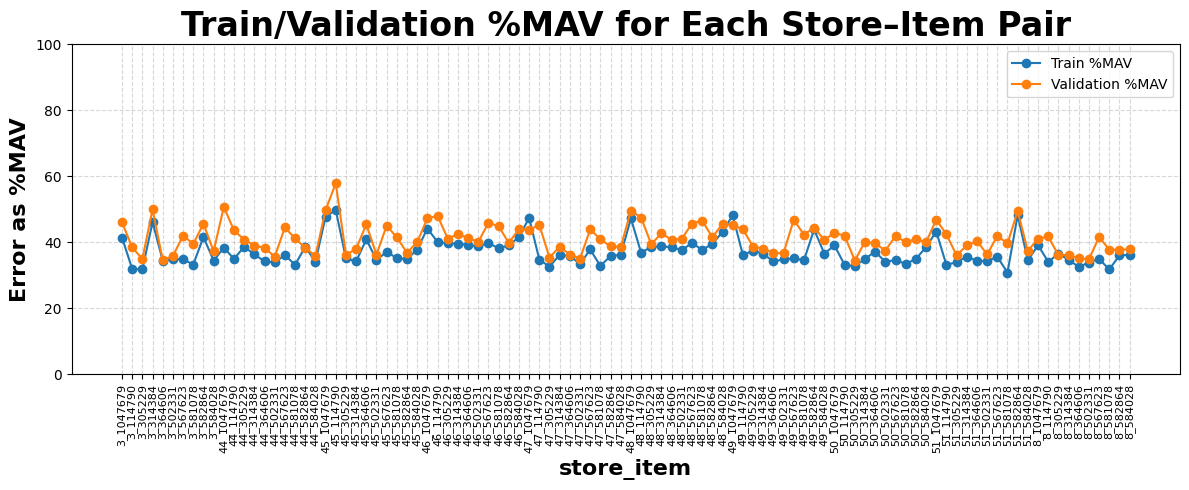

In [126]:
plot_final_percent_mav_per_sid(summary_df, title="Train/Validation %MAV for Each Store–Item Pair", 
                               fn="../output/figures/2025-06-09_TwoLayerNN_final_percent_mav_per_sid.tiff", y_lim=(0, 100))


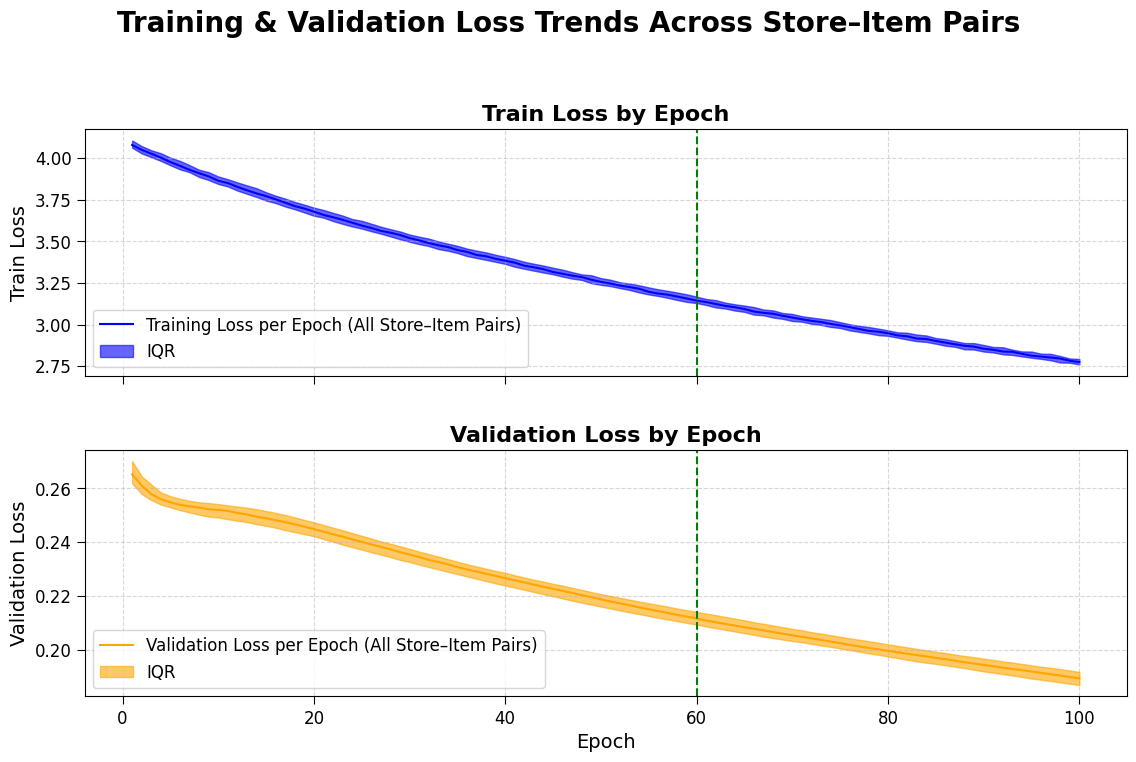

In [127]:
# plot_all_sids_losses(hist_df, 
#                      overall_title="Loss Curves for All Store Items",
# fn=f"../output/figures/all_sids_loss_curves_{today_str}.tiff")
plot_median_iqr_loss(hist_df, 
                     overall_title="Training & Validation Loss Trends Across Store–Item Pairs",
                     xvline=60,
fn=f"../output/figures/2025-06-09_TwoLayerNN_median_iqr_loss_curves_{today_str}.tiff")


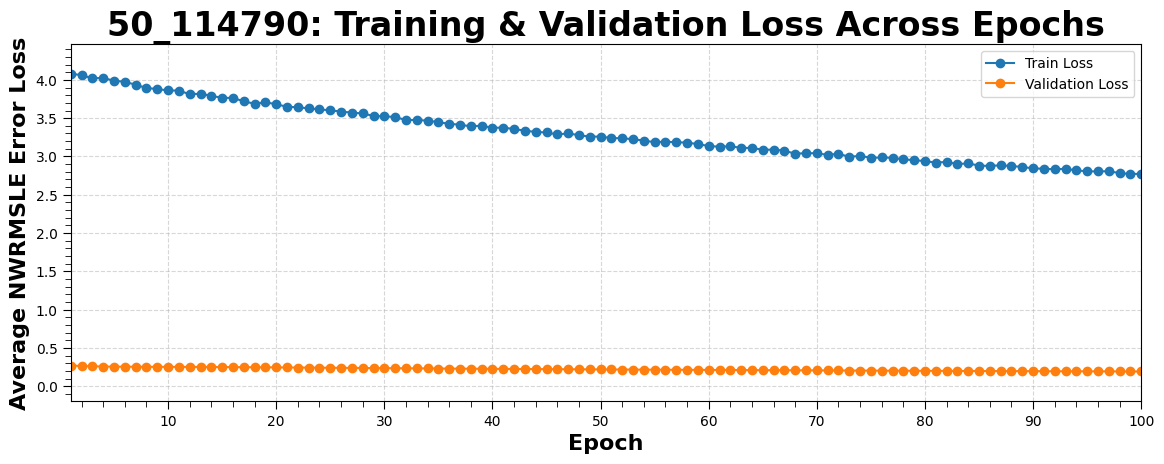

In [128]:
# to plot a single sid:
sid = "50_114790"
title = f"{sid}: Training & Validation Loss Across Epochs"
plot_loss_per_sid(hist_df, title = title,  
                  sid=sid, fn=f"../output/figures/2025-06-09_TwoLayerNN_loss_curves_{sid}_{today_str}.tiff",
                  train_col="train_loss", test_col="test_loss", y_label="Average NWRMSLE Error Loss")

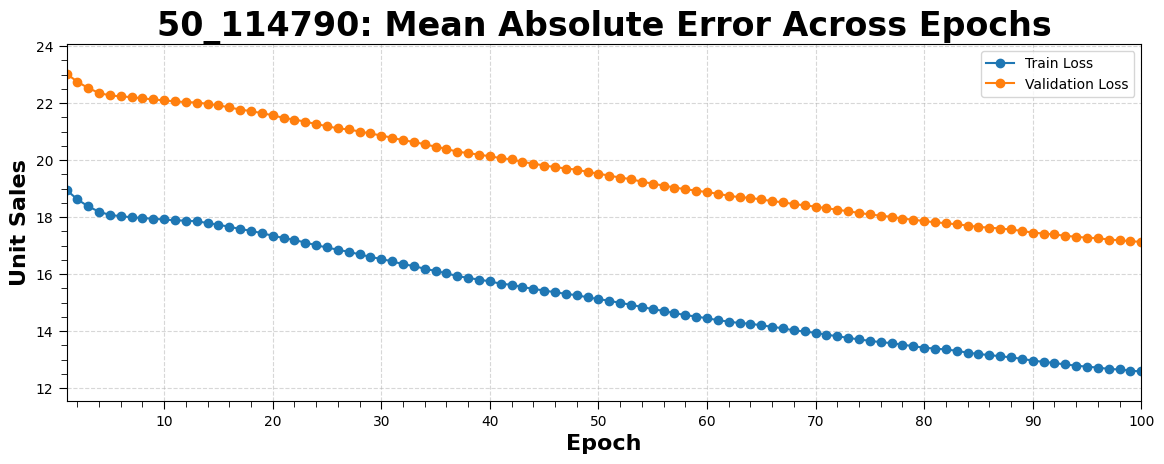

In [129]:
sid = "50_114790"
title = f"{sid}: Mean Absolute Error Across Epochs"
plot_loss_per_sid(hist_df, title=title, 
                  sid=sid, fn=f"../output/figures/2025-06-09_TwoLayerNN_loss_curves_mae_{sid}_{today_str}.tiff", 
                  train_col="train_mae", test_col="test_mae", y_label="Unit Sales")